# Diabetes Analysis

### Author: Ly Duc Trung

### Link: https://github.com/DucTrung1802/DS/blob/main/GLM_Report/diabetes_analysis_upgrade.ipynb

### Dataset Link: https://www.archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

## 0. Install and import libraries

### 0.1. Check R version

In [40]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "4"

$minor
[1] "0.5"

$year
[1] "2021"

$month
[1] "03"

$day
[1] "31"

$`svn rev`
[1] "80133"

$language
[1] "R"

$version.string
[1] "R version 4.0.5 (2021-03-31)"

$nickname
[1] "Shake and Throw"

### 0.2. Install

In [41]:
# INSTALL THESE PACKAGES IN CONDA TERMINAL


### 0.3. Import

In [42]:
library(ggplot2)
library(ROSE)
library(psych)
library(DescTools)
library(BSDA)
library(gmodels)
library(rcompanion)
library(pcaPP)
library(corrplot)
library(caret)
library(MASS)
library(pROC)
library(DHARMa)

In [43]:
### 0.4. Constants

In [44]:
SEED = 123
MAIN_COLOR = "#1155cc"

## 1. Import Data

In [45]:
input_data = read.csv("diabetes_full_data.csv")

In [46]:
df = data.frame(input_data)

In [47]:
df

X,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,1,1,40,1,0,0,0,0,⋯,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,⋯,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,⋯,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,⋯,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,⋯,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,1,0,0,1,1,⋯,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,1,0,0,0,0,⋯,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,1,0,0,1,0,⋯,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,1,0,1,0,1,⋯,0,5,30,30,1,0,9,5,1,1


In [48]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ X                   : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

## 2. Data Preprocessing

### 2.1. Standardize column names

In [49]:
colnames(df)

[1] "X"                    "HighBP"               "HighChol"            
 [4] "CholCheck"            "BMI"                  "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "DiffWalk"            
[19] "Sex"                  "Age"                  "Education"           
[22] "Income"               "Diabetes_binary"

In [50]:
# COMMENT: remove column "X"
if ("X" %in% colnames(df))
{
    df = df[, !colnames(df) == "X"]
}

In [51]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

### 2.2. Mismatched data types

In [52]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

In [53]:
# COMMENT
# All columns have correct data type

### 2.3. Mixed data values

In [54]:
# COMMENT
# Example: (female, woman, man, male) => (male, female)

In [55]:
# COMMENT
# This dataset contains only number data => No mixed data values

### 2.4. Missing data

#### 2.4.1 Null data

In [56]:
sum(is.na(df))

[1] 0

In [57]:
# COMMENT
# This dataset has no missing values

#### 2.4.2 Missing data in specific columns

In [58]:
# COMMENT
# We see that in column "Age", the value could have value of 14 
# which is Don’t know / Refused / Missing (_AGEG5YR - BRFSS)

In [59]:
nrow(subset(df, Age == 14))

[1] 0

In [60]:
# COMMENT
# The dataset has no missing data.

## 3. Exploratory data analysis (EDA)

In [61]:
plot_stack_bar_2x2 = function(table_2x2)
{
    barplot(table_2x2, beside = TRUE, col = c("green", "red"))
    legend("top", legend = rownames(table_2x2), fill = c("green", "red"))
}

In [62]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

### 3.1. Response variable analysis

In [63]:
plot_binary_distribution = function(dataframe, response_col, title)
{
    # Creating a table of counts for each category in the response column
    response_table <- table(dataframe[, response_col])
    
    # Converting the table into a data frame
    response_df <- as.data.frame(response_table)
    
    # Renaming the column
    colnames(response_df) <- c("Response", "Count")
    
    # Calculate percentages
    response_df$Percent <- response_df$Count / sum(response_df$Count) * 100
    
    # Creating a pie chart using ggplot2
    pie_chart <- ggplot(response_df, aes(x = "", y = Count, fill = Response)) +
      geom_bar(stat = "identity", width = 1) +
      coord_polar("y", start = 0) +
      scale_fill_manual(values = c("green", "red")) + 
      labs(title = title) +
      theme_void() +
      theme(legend.position = "bottom", 
            plot.title = element_text(hjust = 0.5, size = 30),  # Adjust title size here
            legend.text = element_text(size = 20)) +            # Adjust legend text size here
      geom_text(aes(label = paste0(round(Percent, 1), "%")), 
                position = position_stack(vjust = 0.5),
                size = 7) + # Adjust label size here
      guides(fill = guide_legend(title = response_col, title.position = "top", title.theme = element_text(size = 15))) # Adjust legend title size here
    
    # Displaying the pie chart
    print(pie_chart)
}

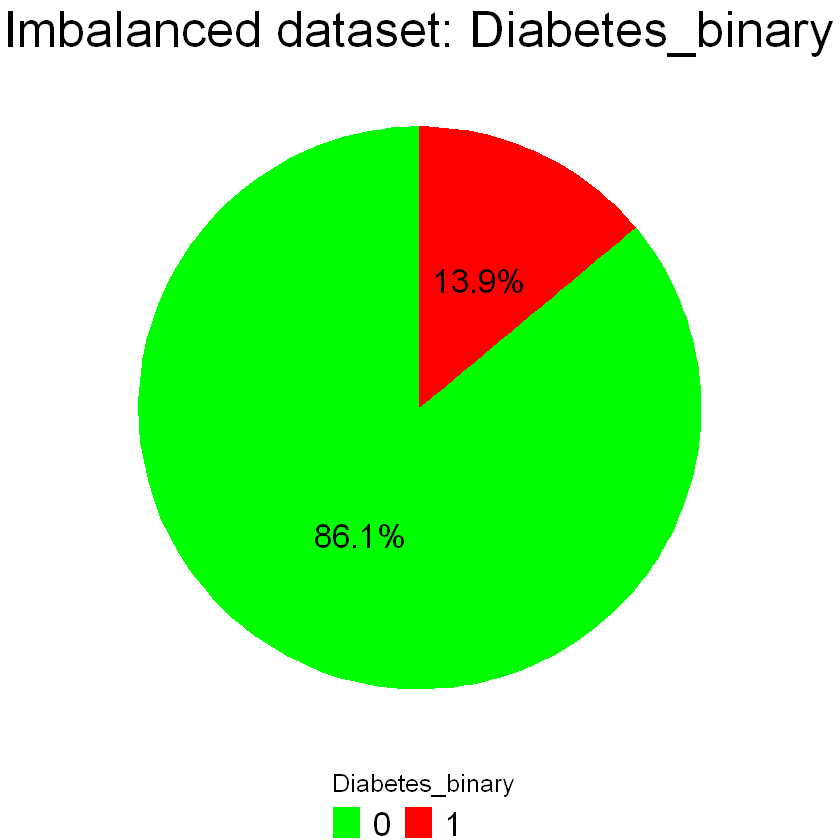

In [64]:
plot_binary_distribution(df, "Diabetes_binary", "Imbalanced dataset: Diabetes_binary")

In [65]:
# COMMENT
# The dataset is imbalanced
# => Apply oversampling method

### 3.2. Dataset oversampling

In [66]:
index = caret::createDataPartition(df$Diabetes_binary, p = 0.8, list = FALSE)
training_data = df[index, ]
testing_data = df[-index, ]

nrow(training_data)
nrow(testing_data)
nrow(training_data[training_data$Diabetes_binary == 1, ]) / nrow(training_data)
nrow(testing_data[testing_data$Diabetes_binary == 1, ]) / nrow(testing_data)

[1] 202944

[1] 50736

[1] 0.1386639

[1] 0.1420096

### 3.3. Training dataset oversampling

In [67]:
table(training_data$Diabetes_binary)


     0      1 
174803  28141 

In [68]:
balanced_training_data <- ovun.sample(Diabetes_binary ~  ., data = training_data,
                                  p = 0.5, seed = SEED, 
                                  method = "over")$data

In [69]:
table(balanced_training_data$Diabetes_binary)


     0      1 
174803 174641 

In [70]:
balanced_training_data

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,40,1,0,0,0,0,1,⋯,0,5,18,15,1,0,9,4,3,0
2,0,0,0,25,1,0,0,1,0,0,⋯,1,3,0,0,0,0,7,6,1,0
3,1,1,1,28,0,0,0,0,1,0,⋯,1,5,30,30,1,0,9,4,8,0
4,1,0,1,27,0,0,0,1,1,1,⋯,0,2,0,0,0,0,11,3,6,0
5,1,1,1,24,0,0,0,1,1,1,⋯,0,2,3,0,0,0,11,5,4,0
6,1,1,1,25,1,0,0,1,1,1,⋯,0,2,0,2,0,1,10,6,8,0
7,1,0,1,30,1,0,0,0,0,0,⋯,0,3,0,14,0,0,9,6,7,0
8,1,1,1,25,1,0,0,1,0,1,⋯,0,3,0,0,1,0,11,4,4,0
9,0,0,1,24,0,0,0,0,0,1,⋯,0,2,0,0,0,1,8,4,3,0


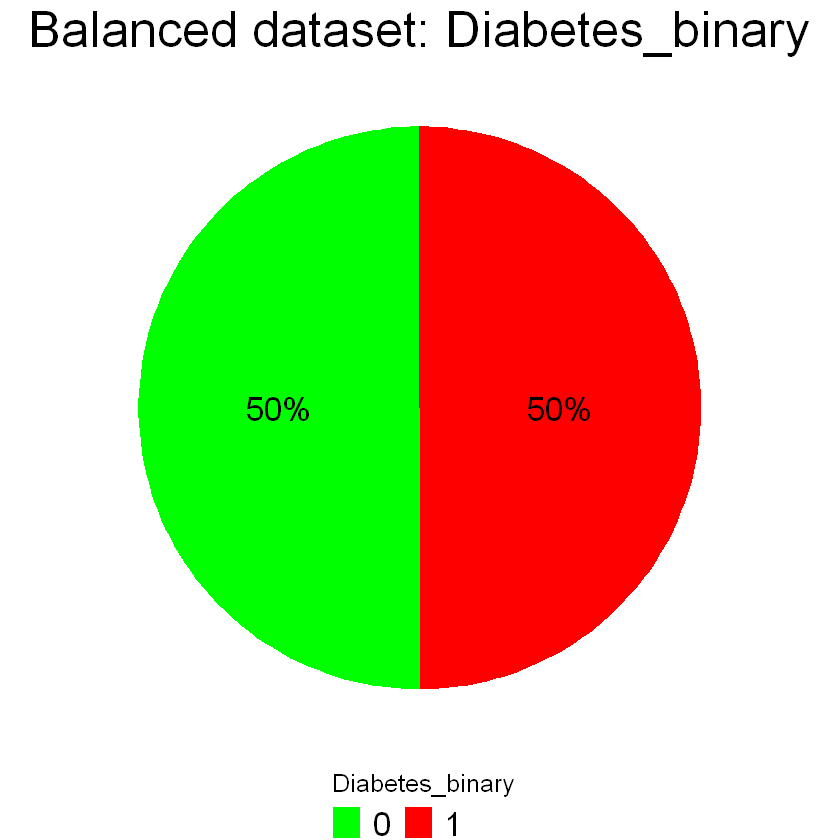

In [71]:
plot_binary_distribution(balanced_training_data, "Diabetes_binary", "Balanced dataset: Diabetes_binary")

In [72]:
with_diabetes_rows = which(balanced_training_data$Diabetes_binary == 1)
no_diabetes_rows = which(balanced_training_data$Diabetes_binary == 0)

### 3.3. Detect Numerical, Binary, Ordinal variables

In [73]:
str(balanced_training_data)

'data.frame':	349444 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 0 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 0 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 24 26 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 0 1 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 0 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 2 3 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 0 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 0 15 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 0 0 ...
 $ Sex                

In [74]:
numerical_cols = c("BMI", "MentHlth", "PhysHlth")
binary_cols = c("HighBP", "HighChol", "CholCheck", "Smoker", "Stroke",
               "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies",
               "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
               "DiffWalk", "Sex")
ordinal_cols = c("GenHlth", "Age", "Education", "Income")
response_col = "Diabetes_binary"

display_matrix = matrix(c(length(numerical_cols), length(binary_cols), length(ordinal_cols)), nrow = 3)
rownames(display_matrix) = c("numerical_cols", "binary_cols", "ordinal_cols")
colnames(display_matrix) = "Number of variable"
display_matrix

,Number of variable
numerical_cols,3
binary_cols,14
ordinal_cols,4


### 3.4. Data factorization

In [75]:
# Training data factorization
for (col in binary_cols)
{
    balanced_training_data[, col] = factor(balanced_training_data[, col])
}

for (col in ordinal_cols)
{
    balanced_training_data[, col] = factor(balanced_training_data[, col], ordered = T)
}

balanced_training_data[, response_col] = factor(balanced_training_data[, response_col])

In [76]:
# Testing data factorization
for (col in binary_cols)
{
    testing_data[, col] = factor(testing_data[, col])
}

for (col in ordinal_cols)
{
    testing_data[, col] = factor(testing_data[, col], ordered = T)
}

testing_data[, response_col] = factor(testing_data[, response_col])

In [77]:
str(balanced_training_data)

'data.frame':	349444 obs. of  22 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 1 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 1 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 24 26 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 1 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 1 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ NoDocbcCost         : Factor w/ 2 levels "

In [78]:
str(testing_data)

'data.frame':	50736 obs. of  22 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 2 1 1 2 1 1 2 2 2 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 2 1 1 2 2 1 1 1 2 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  34 28 23 32 37 31 23 26 31 37 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 1 1 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 2 2 1 2 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 2 1 1 2 1 2 2 2 2 2 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 2 1 2 2 2 2 2 1 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ NoDocbcCost         : Factor w/ 2 levels "0

### 3.4. Numerical variables analysis

In [79]:
# Numerical variables (3): BMI, MentHlth, PhysHlth

In [80]:
psych::describeBy(balanced_training_data[,numerical_cols], balanced_training_data[,response_col])


 Descriptive statistics by group 
group: 0
         vars      n  mean   sd median trimmed  mad min max range skew kurtosis
BMI         1 174803 27.80 6.29     27   27.14 4.45  12  98    86 2.36    13.94
MentHlth    2 174803  2.97 7.10      0    0.93 0.00   0  30    30 2.87     7.41
PhysHlth    3 174803  3.63 8.05      0    1.30 0.00   0  30    30 2.50     5.03
           se
BMI      0.02
MentHlth 0.02
PhysHlth 0.02
------------------------------------------------------------ 
group: 1
         vars      n  mean    sd median trimmed  mad min max range skew
BMI         1 174641 31.95  7.38     31   31.24 5.93  13  98    85 1.54
MentHlth    2 174641  4.42  8.93      0    1.97 0.00   0  30    30 2.08
PhysHlth    3 174641  7.95 11.31      1    6.18 1.48   0  30    30 1.15
         kurtosis   se
BMI          5.74 0.02
MentHlth     2.94 0.02
PhysHlth    -0.34 0.03

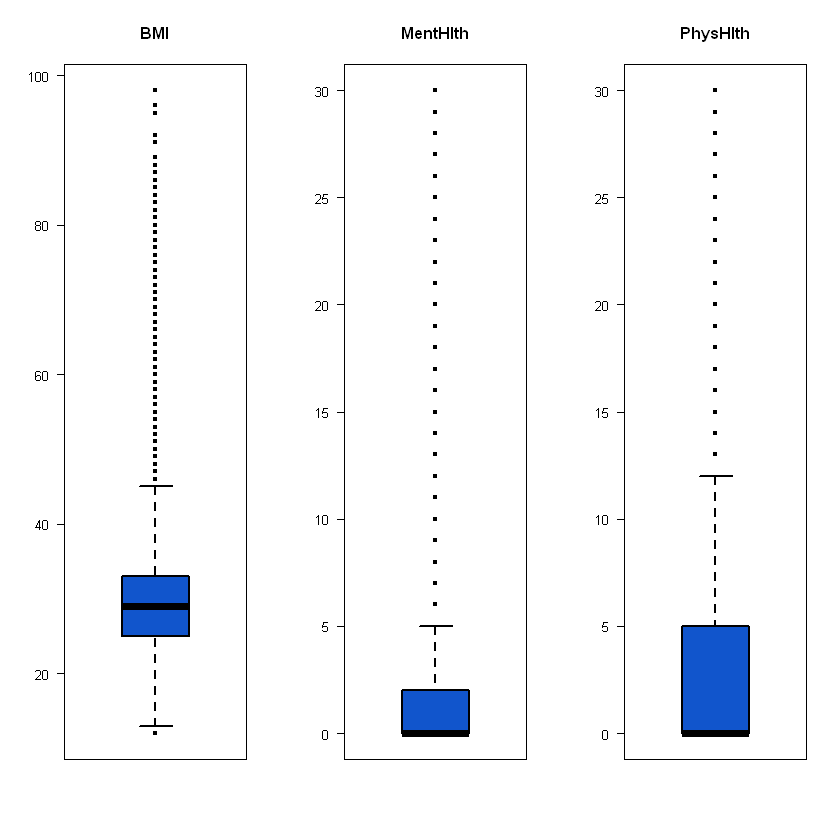

In [81]:
par(mfrow = c(1,3))
boxplot(balanced_training_data$BMI, main = "BMI", col = MAIN_COLOR, las = 1, lwd = 2)
boxplot(balanced_training_data$MentHlth, main = "MentHlth", col = MAIN_COLOR, las = 1, lwd = 2)
boxplot(balanced_training_data$PhysHlth, main = "PhysHlth", col = MAIN_COLOR, las = 1, lwd = 2)

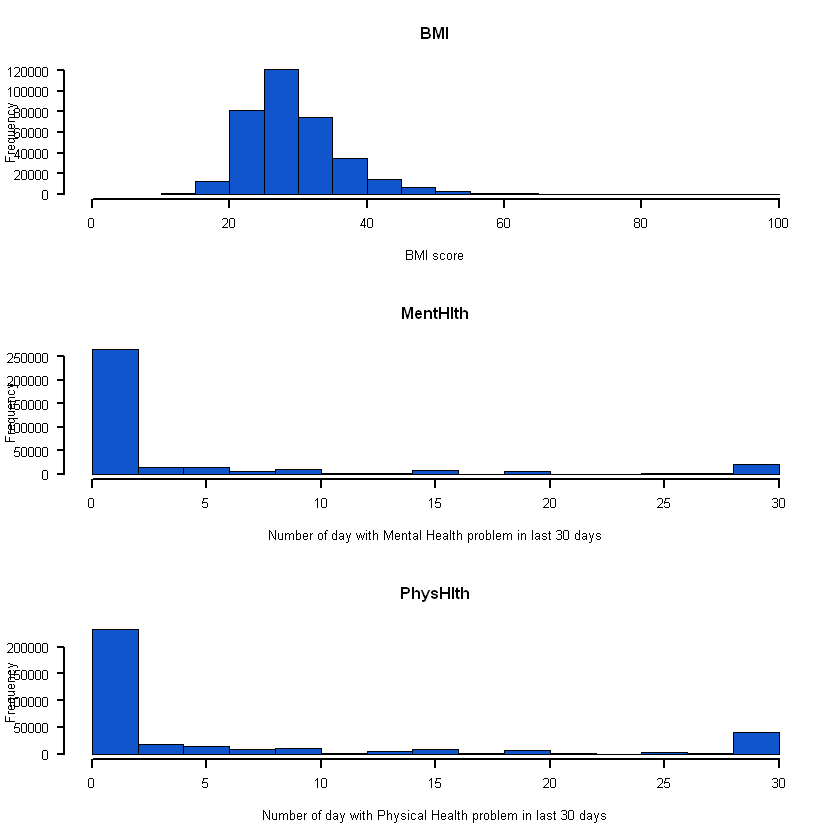

In [82]:
par(mfrow = c(3,1))
hist(balanced_training_data$BMI, main = "BMI", xlab = "BMI score", col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 100))
hist(balanced_training_data$MentHlth, main = "MentHlth", xlab = "Number of day with Mental Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2)
hist(balanced_training_data$PhysHlth, main = "PhysHlth", xlab = "Number of day with Physical Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2)

#### 3.4.1. BMI

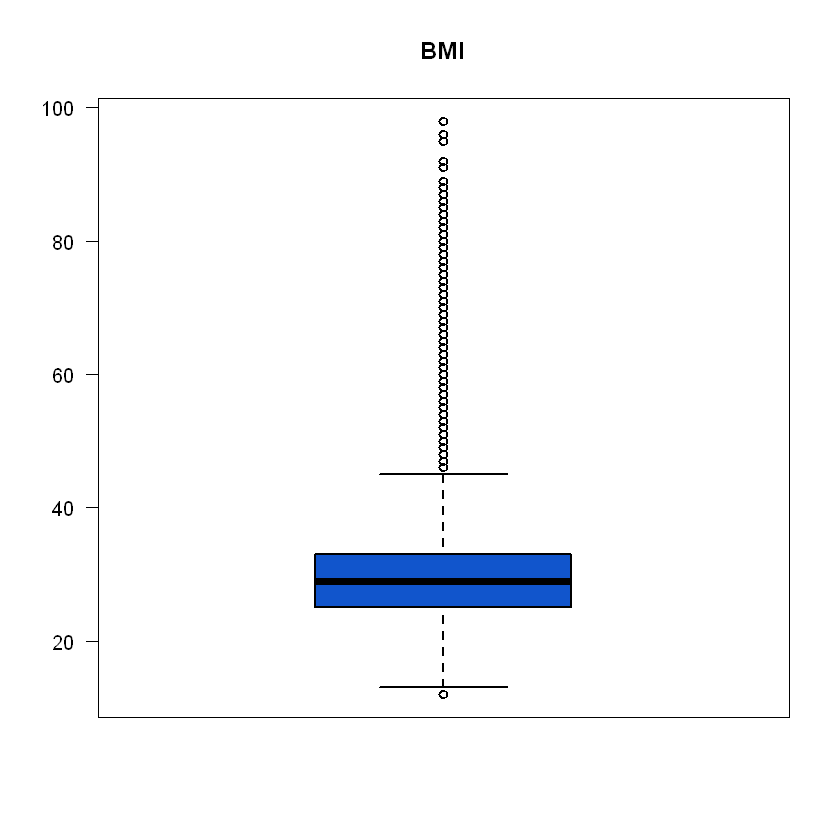

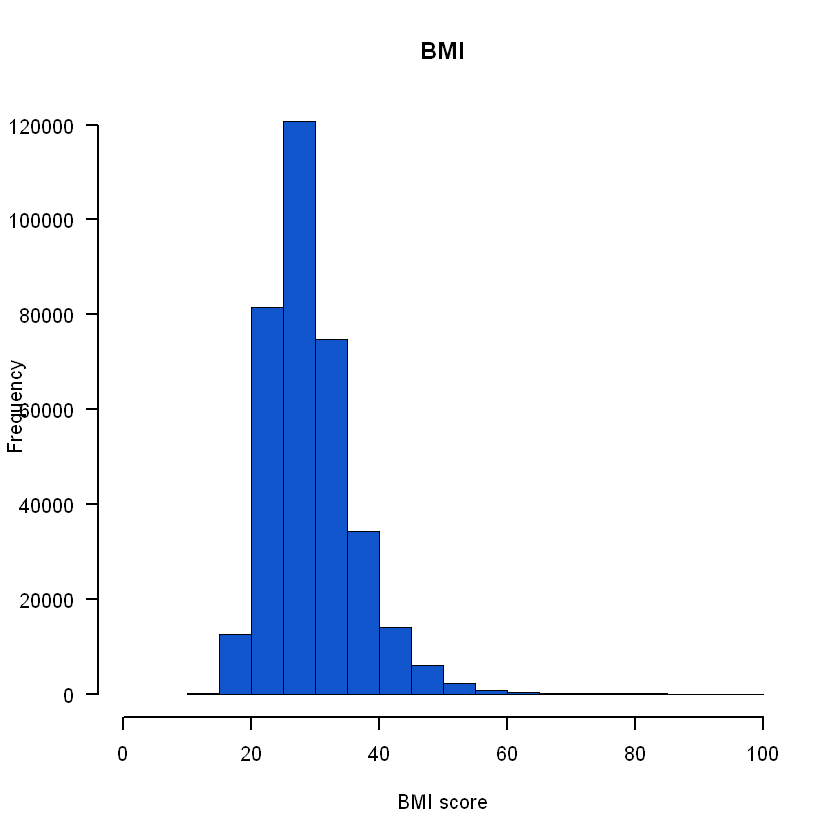

In [83]:
boxplot(balanced_training_data$BMI, main = "BMI", col = MAIN_COLOR, las = 1, lwd = 2)
hist(balanced_training_data$BMI, main = "BMI", xlab = "BMI score", col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 100))

In [84]:
BMI_q1 = quantile(balanced_training_data$BMI, probs = 0.25, names = F)
BMI_q3 = quantile(balanced_training_data$BMI, probs = 0.75, names = F)
BMI_upper_quartile = BMI_q3 + 1.5 * (BMI_q3 - BMI_q1)
cat("Maximum value of boxplot BMI:", BMI_upper_quartile)

Maximum value of boxplot BMI: 45

#### Question: The percentage of diabetes people having BMI under 45 and over 45.

In [85]:
BMI_THRESH_HOLD = 45

In [86]:
BMI_table = table(ifelse(balanced_training_data$BMI > BMI_THRESH_HOLD, sprintf("BMI > %d", BMI_THRESH_HOLD), sprintf("BMI < %d", BMI_THRESH_HOLD)),
      ifelse(balanced_training_data$Diabetes_binary == 1, "diabetes", "no diabetes"))
BMI_table = BMI_table[, c(2, 1)]
BMI_table

          
           no diabetes diabetes
  BMI < 45      172314   166161
  BMI > 45        2489     8480

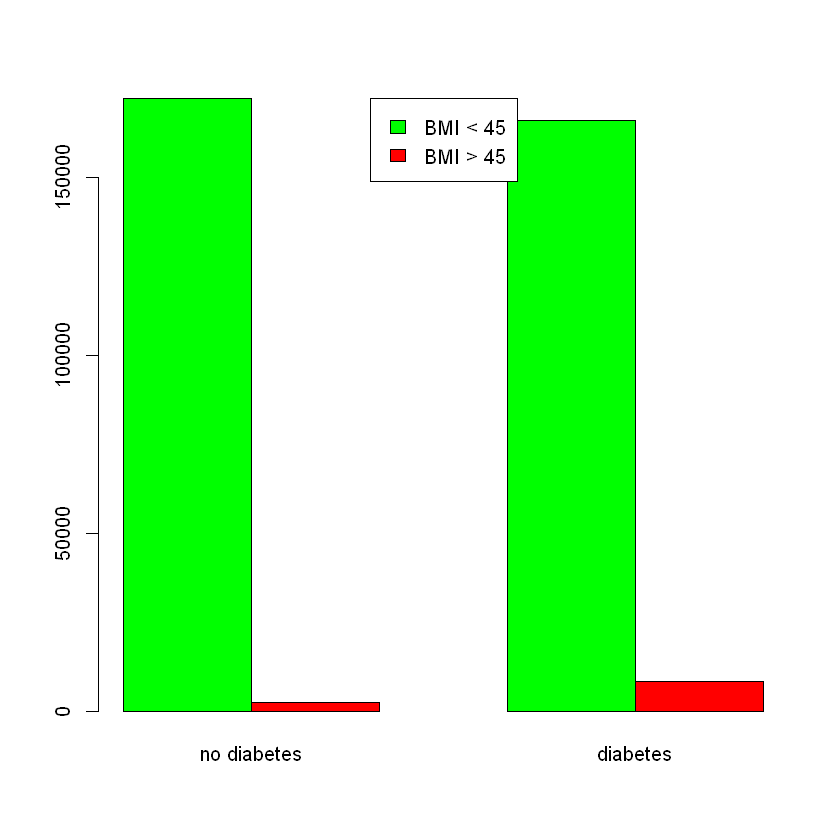

In [87]:
plot_stack_bar_2x2(BMI_table)

In [88]:
DescTools::OddsRatio(BMI_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  3.533153   3.377056   3.696464

In [89]:
# COMMENT
# odds ratio = 3.452 > 1
# People with BMI over 45 are 3.452 times more likely to have diabetes than others.
# => Create a binary variable that to distinguish people having BMI over 45.

In [90]:
if (!"BMI_over_45" %in% binary_cols)
{
    binary_cols = append(binary_cols, "BMI_over_45")
}

In [91]:
# Add new column for training data
new_column = factor(as.integer(ifelse(balanced_training_data$BMI > BMI_THRESH_HOLD, 1, 0)))
BMI_index = which(colnames(balanced_training_data) == "BMI")
balanced_training_data = cbind(balanced_training_data[,1:BMI_index], BMI_over_45 = new_column, balanced_training_data[,(BMI_index+1):ncol(balanced_training_data)])

In [92]:
# Add new column for testing data
new_column = factor(as.integer(ifelse(testing_data$BMI > BMI_THRESH_HOLD, 1, 0)))
BMI_index = which(colnames(testing_data) == "BMI")
testing_data = cbind(testing_data[,1:BMI_index], BMI_over_45 = new_column, testing_data[,(BMI_index+1):ncol(testing_data)])

In [93]:
str(balanced_training_data)

'data.frame':	349444 obs. of  23 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 1 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 1 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 24 26 ...
 $ BMI_over_45         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 1 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 1 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "

In [94]:
str(testing_data)

'data.frame':	50736 obs. of  23 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 2 1 1 2 1 1 2 2 2 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 2 1 1 2 2 1 1 1 2 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  34 28 23 32 37 31 23 26 31 37 ...
 $ BMI_over_45         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 1 1 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 2 2 1 2 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 2 1 1 2 1 2 2 2 2 2 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 2 1 2 2 2 2 2 1 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0

#### 3.4.2. MentHlth

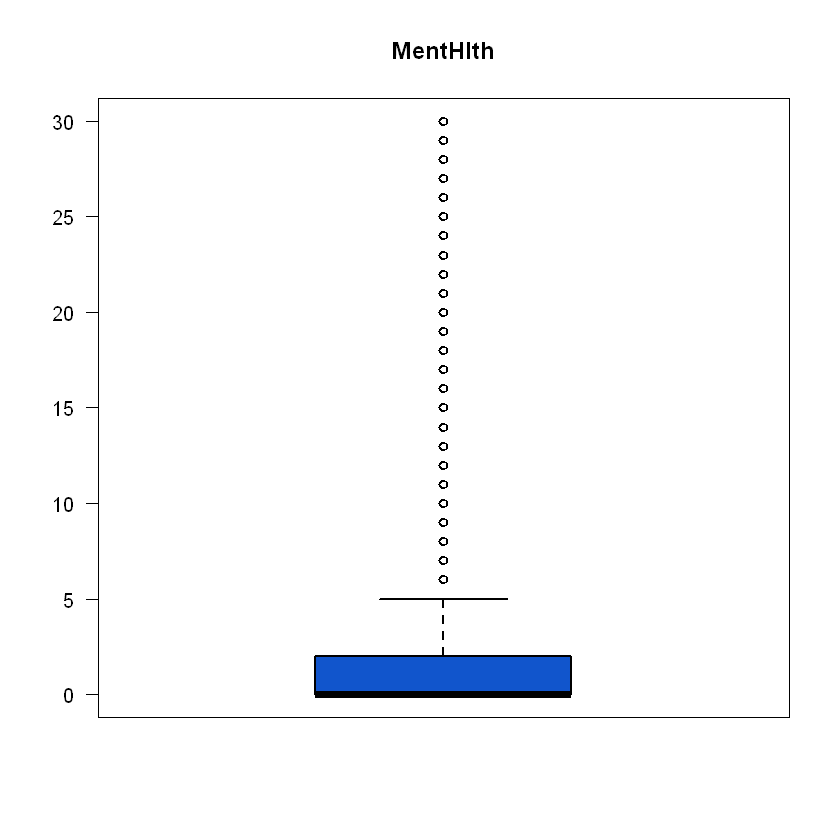

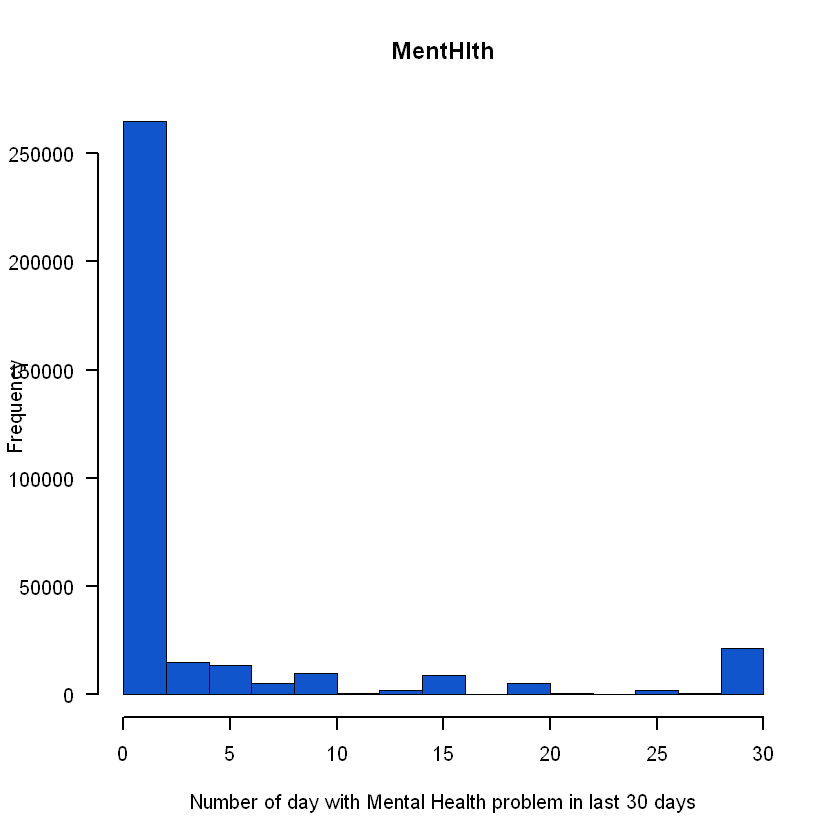

In [95]:
boxplot(balanced_training_data$MentHlth, main = "MentHlth", col = MAIN_COLOR, las = 1, lwd = 2)
hist(balanced_training_data$MentHlth, main = "MentHlth", xlab = "Number of day with Mental Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 30))

#### Question: The percentage of diabetes people having MentHlth or not.

In [96]:
MentHlth_table = table(ifelse(balanced_training_data$MentHlth > 0, "have MentHlth", "no MentHlth"),
      ifelse(balanced_training_data$Diabetes_binary == 1, "diabetes", "no diabetes"))

In [97]:
MentHlth_table = Rev(MentHlth_table)

In [98]:
MentHlth_table

               
                no diabetes diabetes
  no MentHlth        121961   116317
  have MentHlth       52842    58324

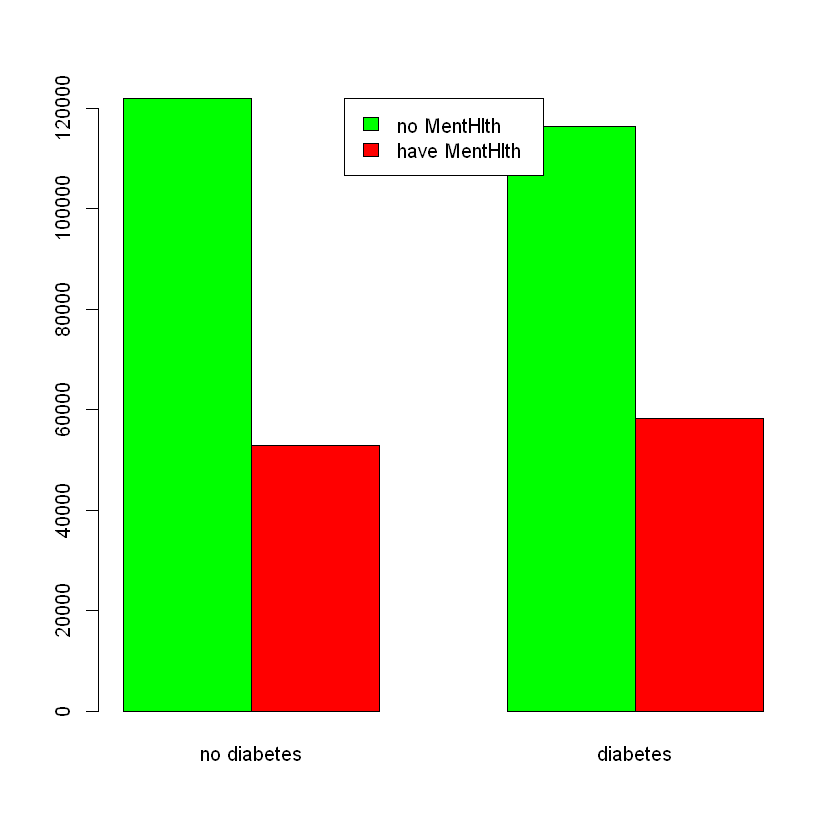

In [99]:
plot_stack_bar_2x2(MentHlth_table)

In [100]:
DescTools::OddsRatio(MentHlth_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  1.157300   1.140924   1.173910

In [101]:
# COMMENT
# odd ratio is close to 1
# => No creating new binary variable

#### 3.4.3. PhysHlth

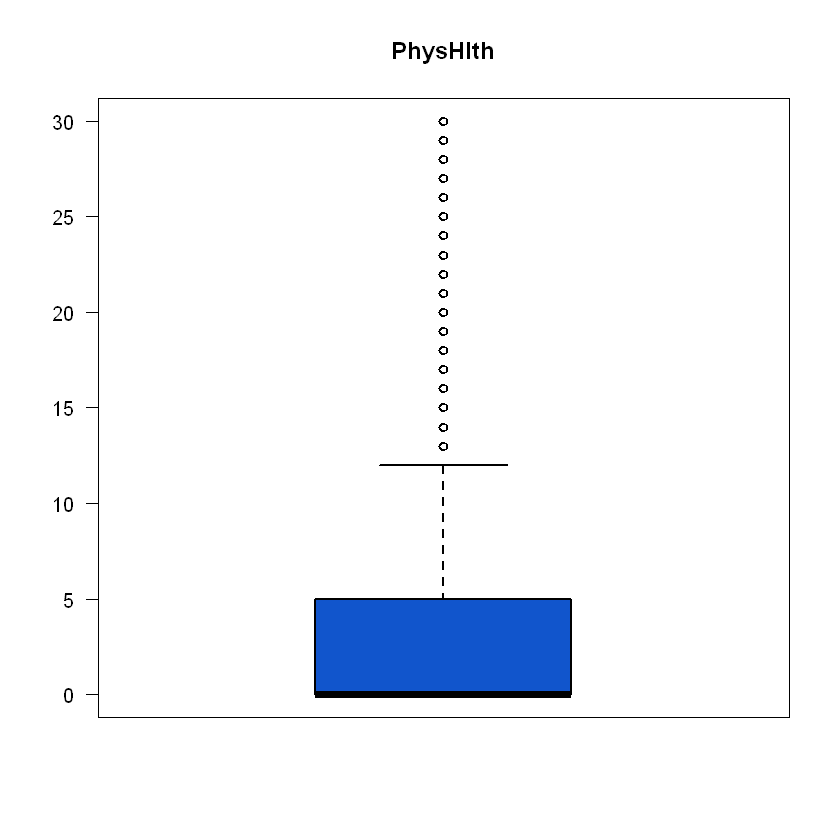

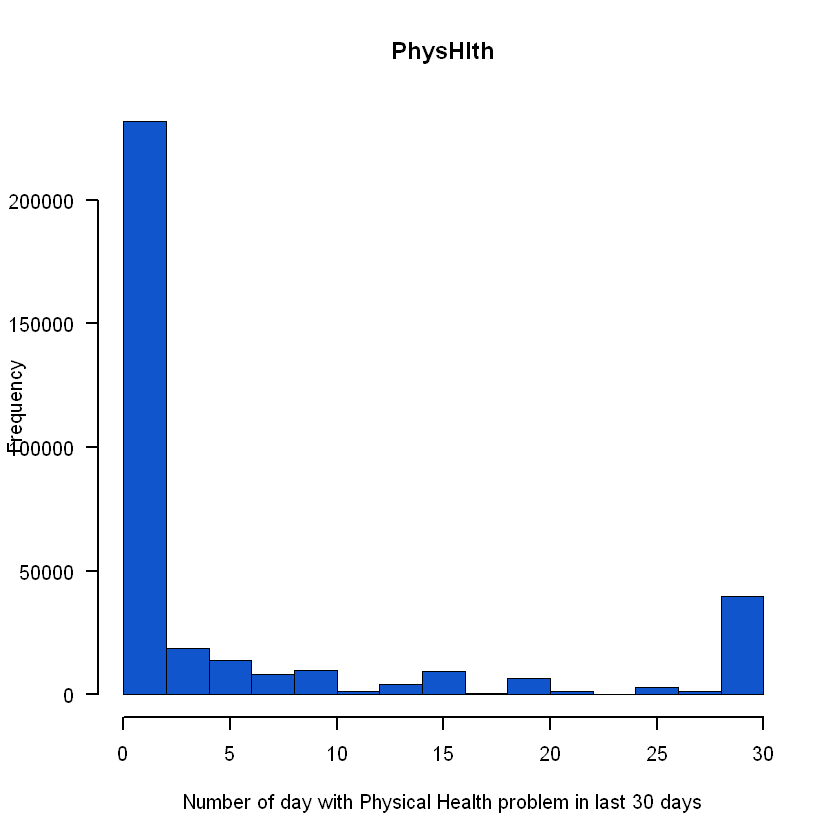

In [102]:
boxplot(balanced_training_data$PhysHlth, main = "PhysHlth", col = MAIN_COLOR, las = 1, lwd = 2)
hist(balanced_training_data$PhysHlth, main = "PhysHlth", xlab = "Number of day with Physical Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 30))

#### Question: The percentage of diabetes people having PhysHlth or not.

In [103]:
PhysHlth_table = table(ifelse(balanced_training_data$PhysHlth > 0, "have PhysHlth", "no PhysHlth"),
      ifelse(balanced_training_data$Diabetes_binary == 1, "diabetes", "no diabetes"))

In [104]:
PhysHlth_table = Rev(PhysHlth_table)

In [105]:
PhysHlth_table

               
                no diabetes diabetes
  no PhysHlth        114746    82697
  have PhysHlth       60057    91944

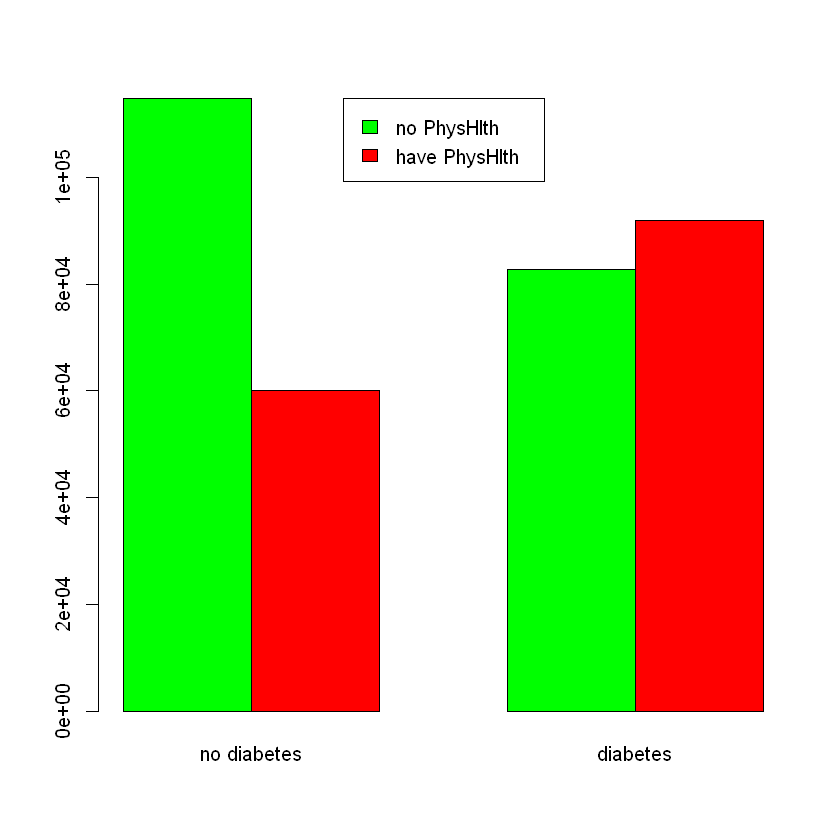

In [106]:
plot_stack_bar_2x2(PhysHlth_table)

In [107]:
OddsRatio(PhysHlth_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  2.124259   2.095510   2.153403

In [108]:
# odds ratio = 2.118 > 1
# People have PhysHlth are 2.118 times more likely to have diabetes than others.
# => Create a binary variable that to distinguish people having PhysHlth.

In [109]:
if (! "havePhysHlth" %in% binary_cols)
{
    binary_cols = append(binary_cols, "havePhysHlth")
}

In [110]:
binary_cols

[1] "HighBP"               "HighChol"             "CholCheck"           
 [4] "Smoker"               "Stroke"               "HeartDiseaseorAttack"
 [7] "PhysActivity"         "Fruits"               "Veggies"             
[10] "HvyAlcoholConsump"    "AnyHealthcare"        "NoDocbcCost"         
[13] "DiffWalk"             "Sex"                  "BMI_over_45"         
[16] "havePhysHlth"

In [111]:
# Add new column for training data
new_column = factor(as.integer(ifelse(balanced_training_data$PhysHlth > 0, 1, 0)))
PhysHlth_index = which(colnames(balanced_training_data) == "PhysHlth")
balanced_training_data = cbind(balanced_training_data[,1:PhysHlth_index], havePhysHlth = new_column, balanced_training_data[,(PhysHlth_index+1):ncol(balanced_training_data)])

In [112]:
# Add new column for testing data
new_column = factor(as.integer(ifelse(testing_data$PhysHlth > 0, 1, 0)))
PhysHlth_index = which(colnames(testing_data) == "PhysHlth")
testing_data = cbind(testing_data[,1:PhysHlth_index], havePhysHlth = new_column, testing_data[,(PhysHlth_index+1):ncol(testing_data)])

In [113]:
str(balanced_training_data)

'data.frame':	349444 obs. of  24 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 1 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 1 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 24 26 ...
 $ BMI_over_45         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 1 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 1 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "

In [114]:
str(testing_data)

'data.frame':	50736 obs. of  24 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 2 1 1 2 1 1 2 2 2 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 2 1 1 2 2 1 1 1 2 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  34 28 23 32 37 31 23 26 31 37 ...
 $ BMI_over_45         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 1 1 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 2 2 1 2 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 2 1 1 2 1 2 2 2 2 2 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 2 1 2 2 2 2 2 1 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0

### 3.5. Categorical - binary variables analysis

In [115]:
binary_cols

[1] "HighBP"               "HighChol"             "CholCheck"           
 [4] "Smoker"               "Stroke"               "HeartDiseaseorAttack"
 [7] "PhysActivity"         "Fruits"               "Veggies"             
[10] "HvyAlcoholConsump"    "AnyHealthcare"        "NoDocbcCost"         
[13] "DiffWalk"             "Sex"                  "BMI_over_45"         
[16] "havePhysHlth"

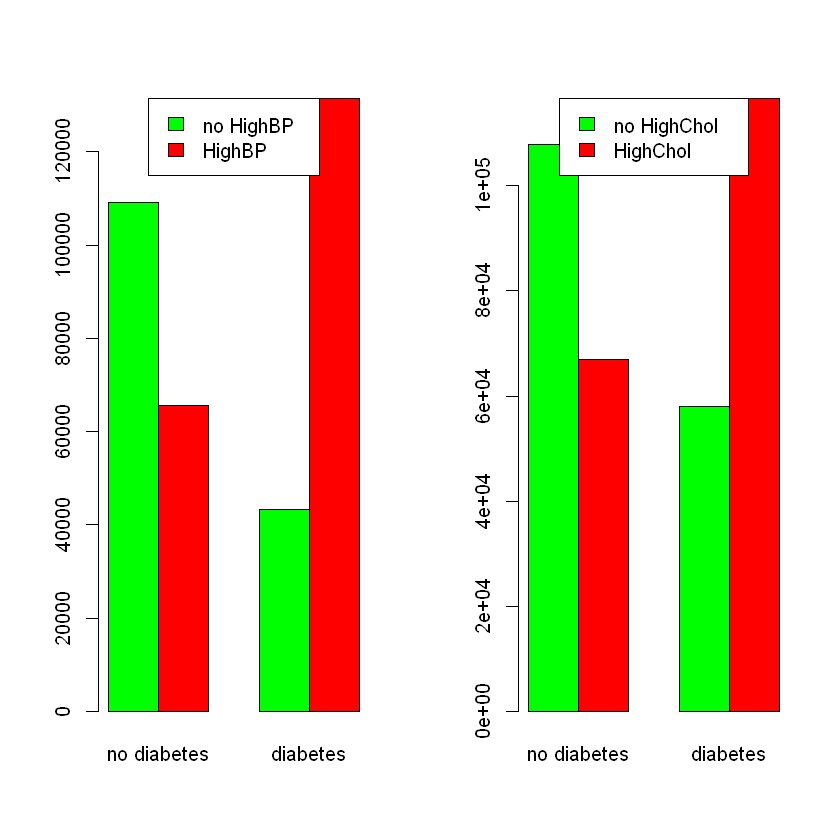

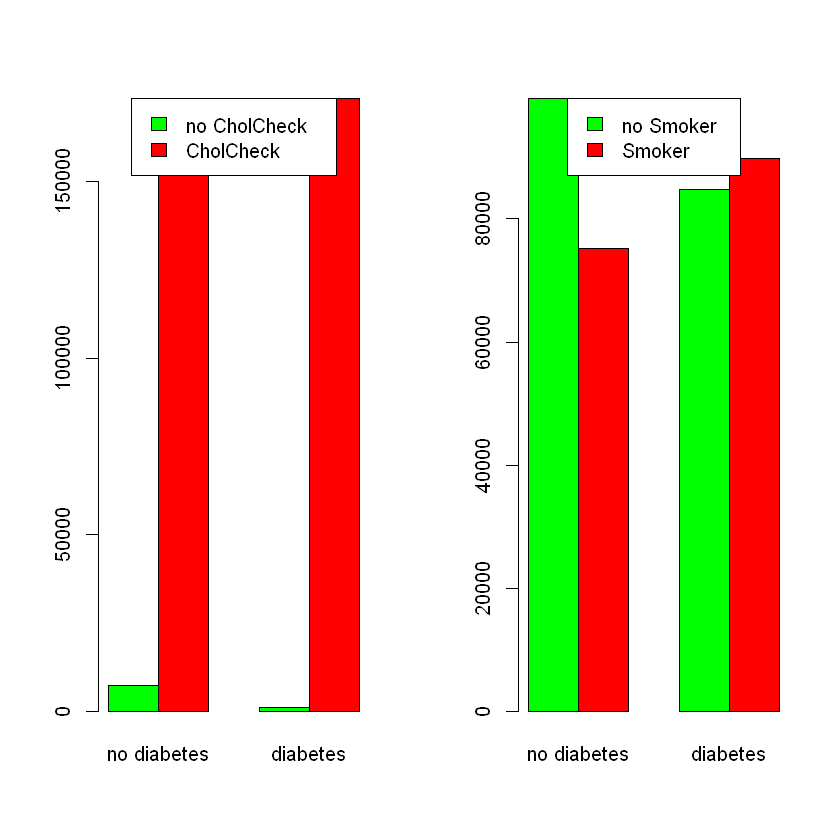

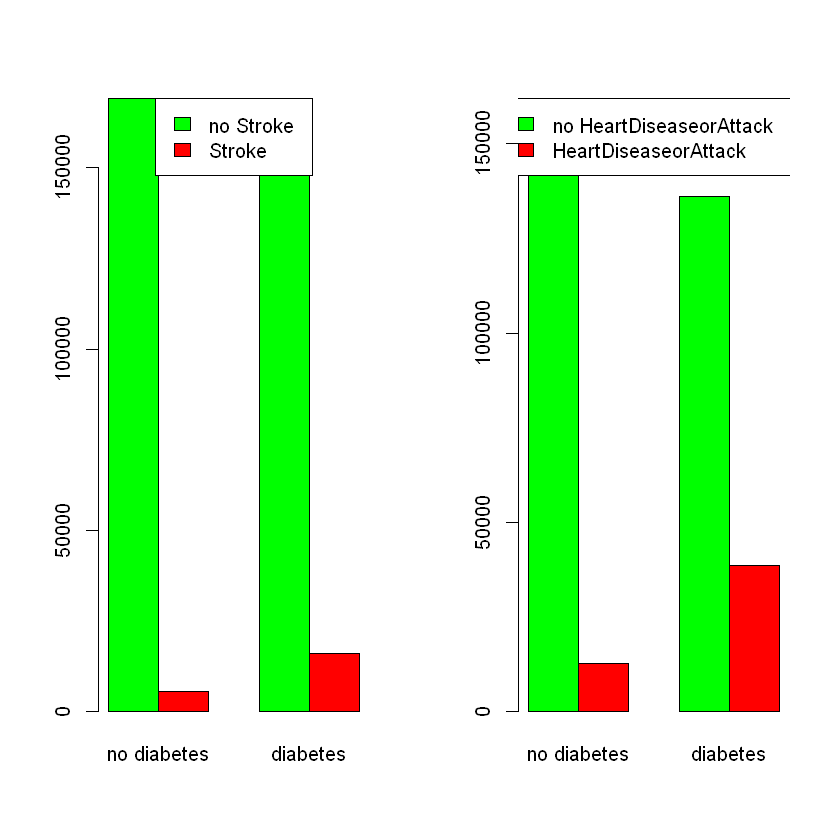

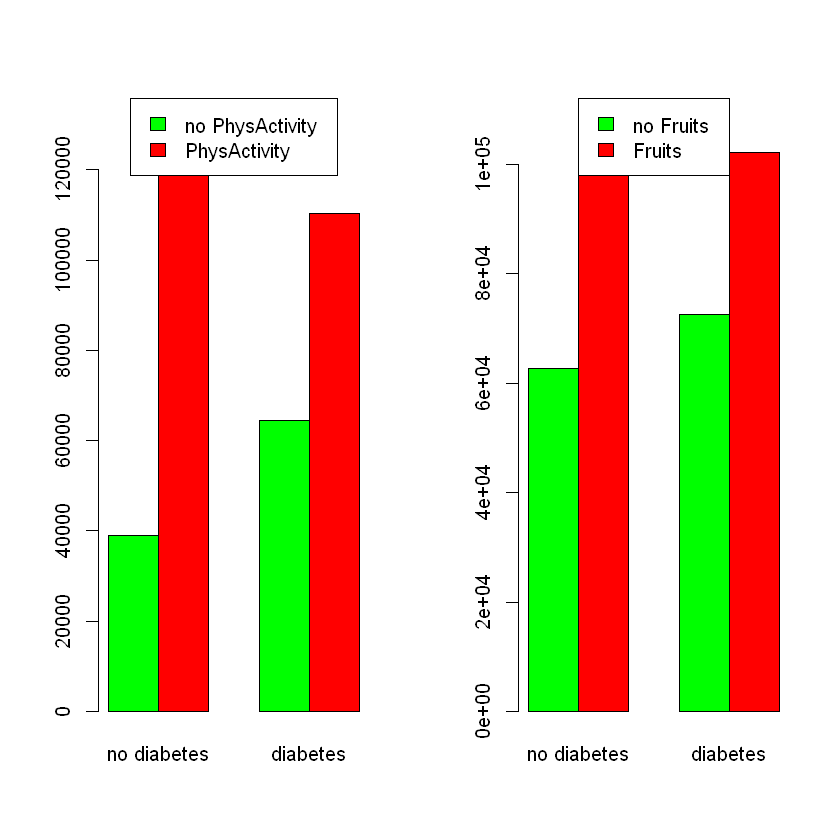

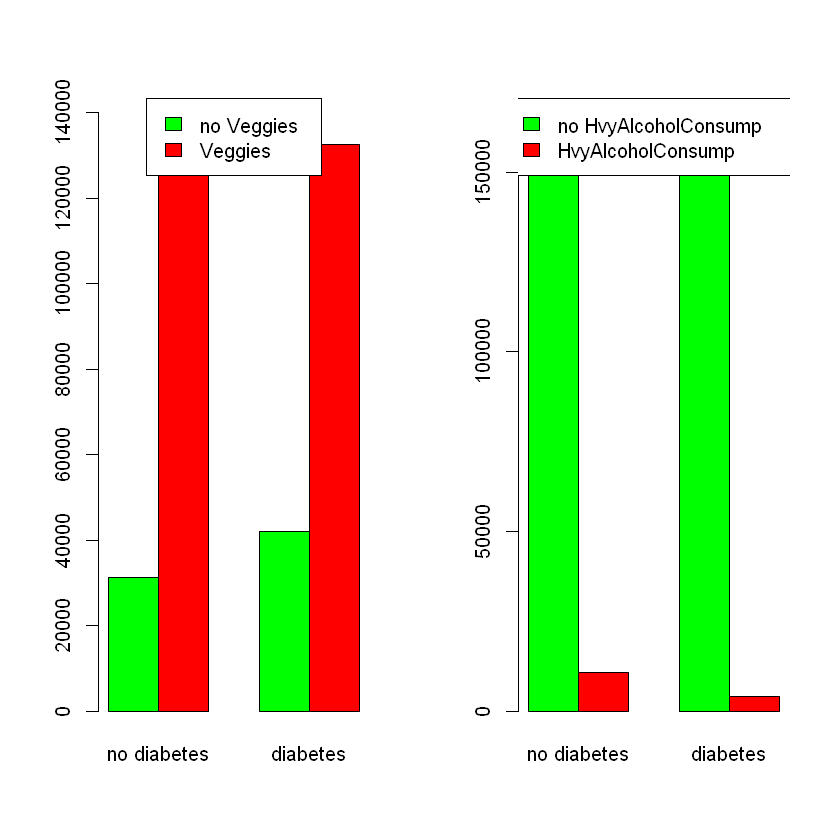

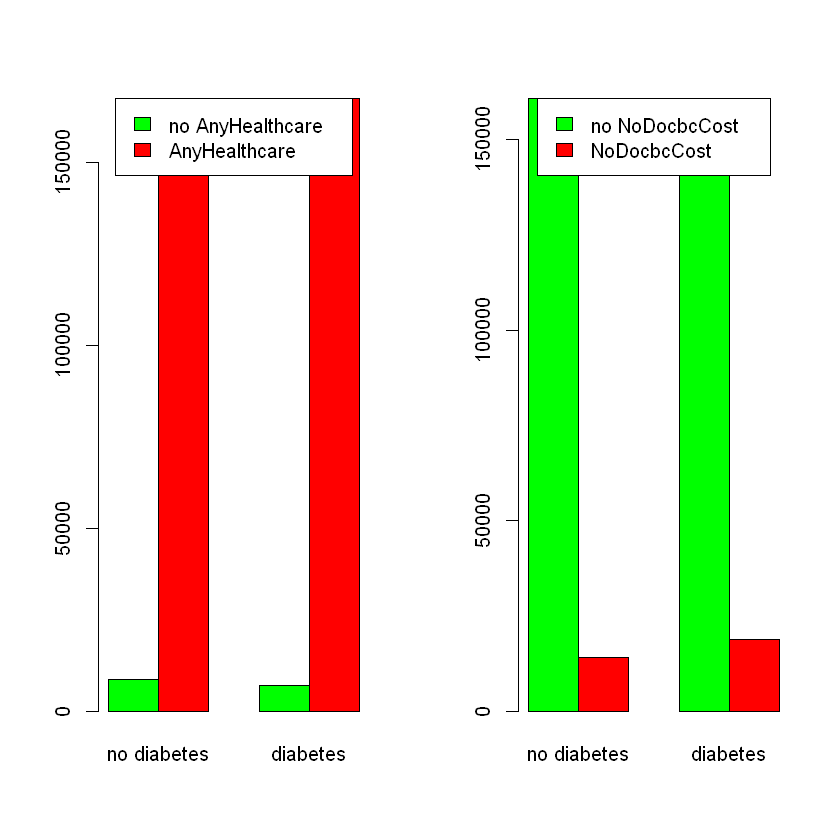

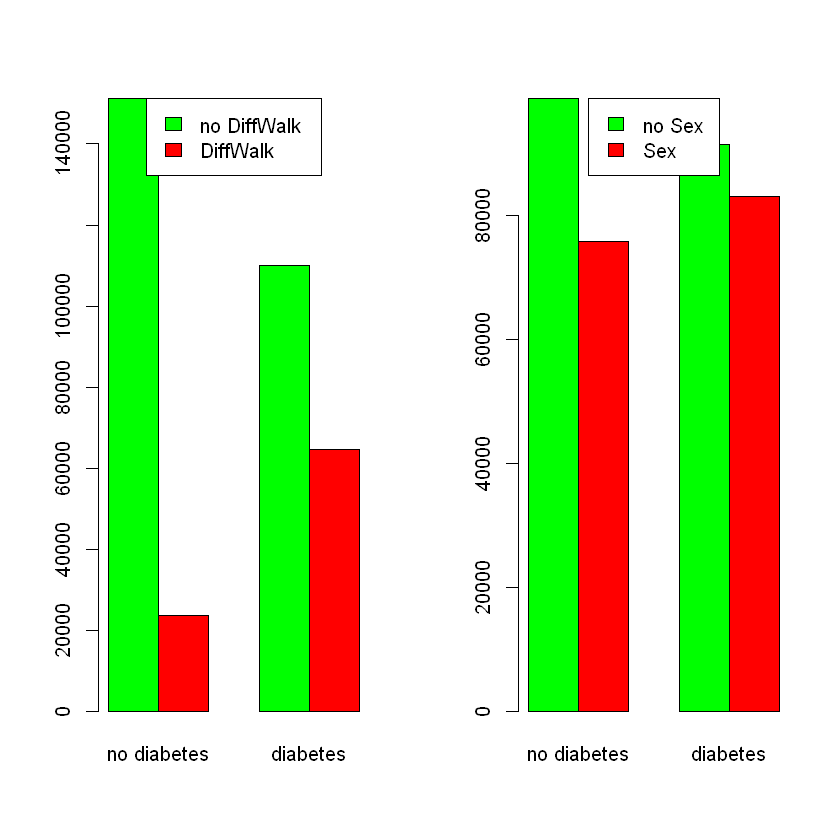

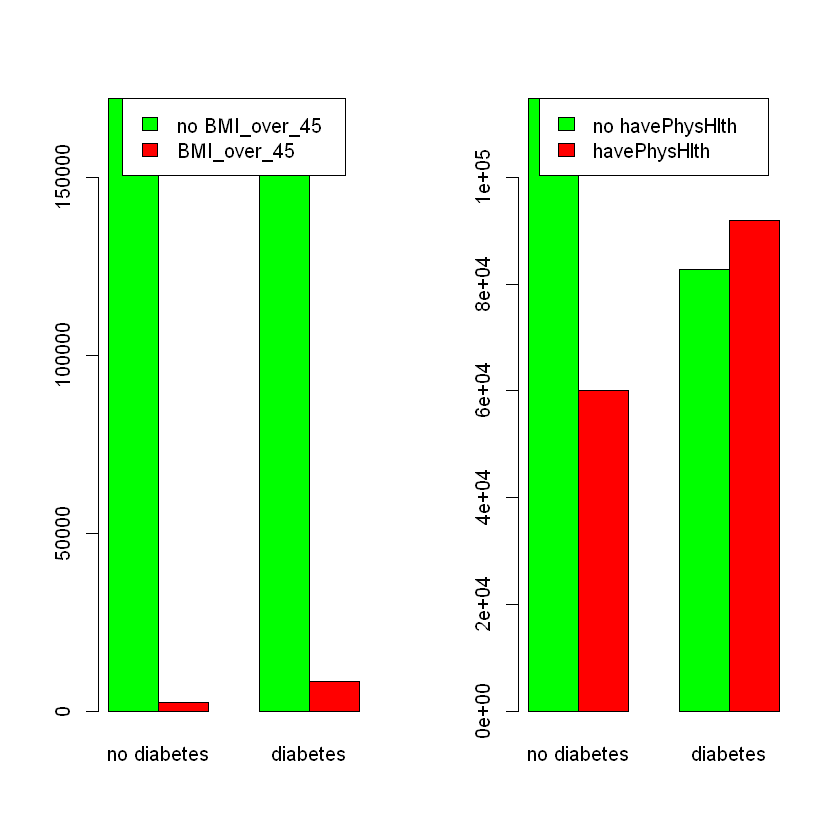

In [116]:
par(mfrow = c(1,2))
for (col in binary_cols)
{
    contingency_table = table(balanced_training_data[, col], balanced_training_data$Diabetes_binary)
    rownames(contingency_table) = c(sprintf("no %s", col), col)
    colnames(contingency_table) = c("no diabetes", "diabetes")
    plot_stack_bar_2x2(contingency_table)
}

In [117]:
summary_categorical_variables = function(df, explain_col, response_col, is.binary = T, prop.r = T,
                                        prop.c = T, prop.t = T)
{
    contingency_table = table(df[, explain_col], df[, response_col], dnn = c(explain_col, response_col))
    if (is.binary)
    {
        rownames(contingency_table) = c(paste("no", explain_col), explain_col)
        gmodels::CrossTable(contingency_table, prop.r = prop.r, prop.c = prop.c, prop.t = prop.t, prop.chisq = FALSE, chisq = T)
        print("Odds Ratio")
        print(OddsRatio(contingency_table, conf.level = 0.95))
        print("Relative Risk")
        print(RelRisk(contingency_table, conf.level = 0.95, method = "wald"))
    }
    else
    {
        CrossTable(contingency_table, prop.r = prop.r, prop.c = prop.c, prop.t = prop.t, prop.chisq = FALSE, chisq = T)
    }
}

In [118]:
for (bin_col in binary_cols)
{
    summary_categorical_variables(balanced_training_data, bin_col, response_col)
}


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  349444 

 
             | Diabetes_binary 
      HighBP |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
   no HighBP |    109129 |     43212 |    152341 | 
             |     0.716 |     0.284 |     0.436 | 
             |     0.624 |     0.247 |           | 
             |     0.312 |     0.124 |           | 
-------------|-----------|-----------|-----------|
      HighBP |     65674 |    131429 |    197103 | 
             |     0.333 |     0.667 |     0.564 | 
             |     0.376 |     0.753 |           | 
             |     0.188 |     0.376 |           | 
-------------|-----------|-----------|-----------|
Column Total |    174803 |    174641 |    349444 | 
             |     0.500 |     0.500 |           | 
-----------

### 3.6. Categorical - ordinal variables analysis

In [119]:
ordinal_cols

[1] "GenHlth"   "Age"       "Education" "Income"

In [120]:
for (ord_col in ordinal_cols)
{
    summary_categorical_variables(df, ord_col, response_col, is.binary = F)
}


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  253680 

 
             | Diabetes_binary 
     GenHlth |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           1 |     44159 |      1140 |     45299 | 
             |     0.975 |     0.025 |     0.179 | 
             |     0.202 |     0.032 |           | 
             |     0.174 |     0.004 |           | 
-------------|-----------|-----------|-----------|
           2 |     82703 |      6381 |     89084 | 
             |     0.928 |     0.072 |     0.351 | 
             |     0.379 |     0.181 |           | 
             |     0.326 |     0.025 |           | 
-------------|-----------|-----------|-----------|
           3 |     62189 |     13457 |     75646 | 
             |     0.822 |     0.178 |     0.298 | 
           

In [121]:
plot_ordinal_data = function(dataframe, ordinal_col)
{
    barplot(summary(factor(dataframe[no_diabetes_rows, ][, ordinal_col])), main = sprintf("no_diabetes_rows - %s", ordinal_col),
           col = MAIN_COLOR, las = 1, lwd = 2)
    barplot(summary(factor(dataframe[with_diabetes_rows, ][, ordinal_col])), main = sprintf("no_diabetes_rows - %s", ordinal_col),
           col = MAIN_COLOR, las = 1, lwd = 2)
}

#### 3.6.1. GenHlth

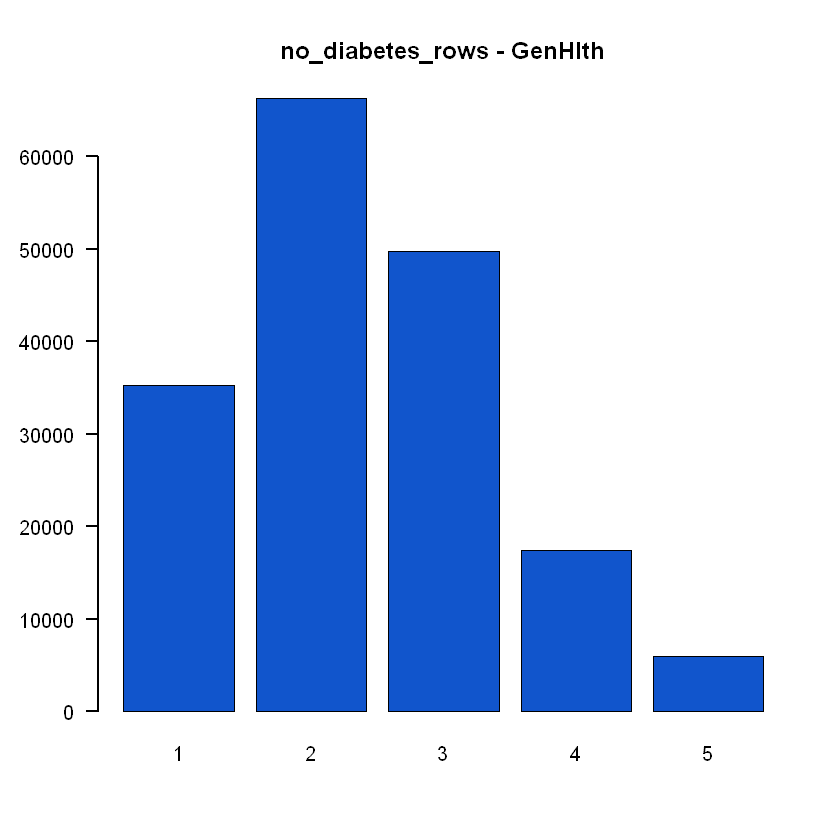

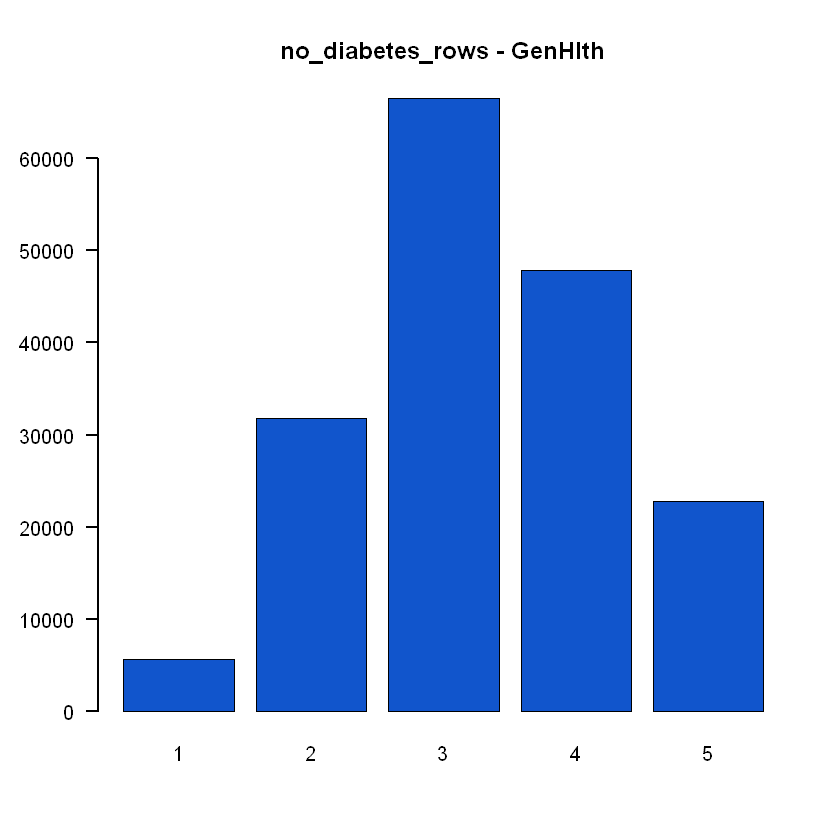

In [122]:
plot_ordinal_data(balanced_training_data, "GenHlth")

#### 3.6.2. Age

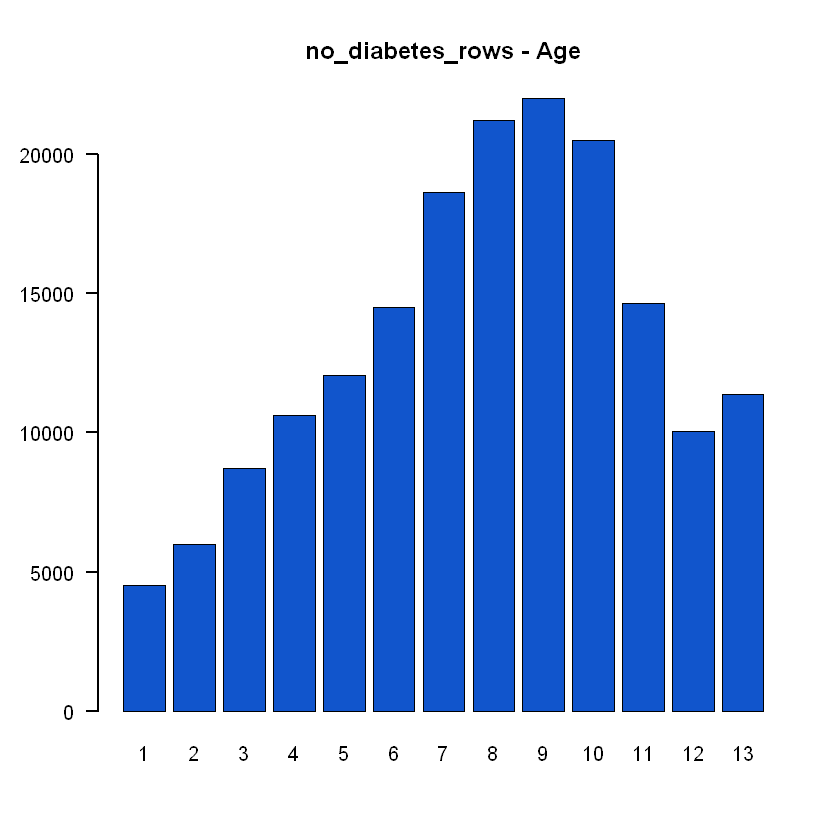

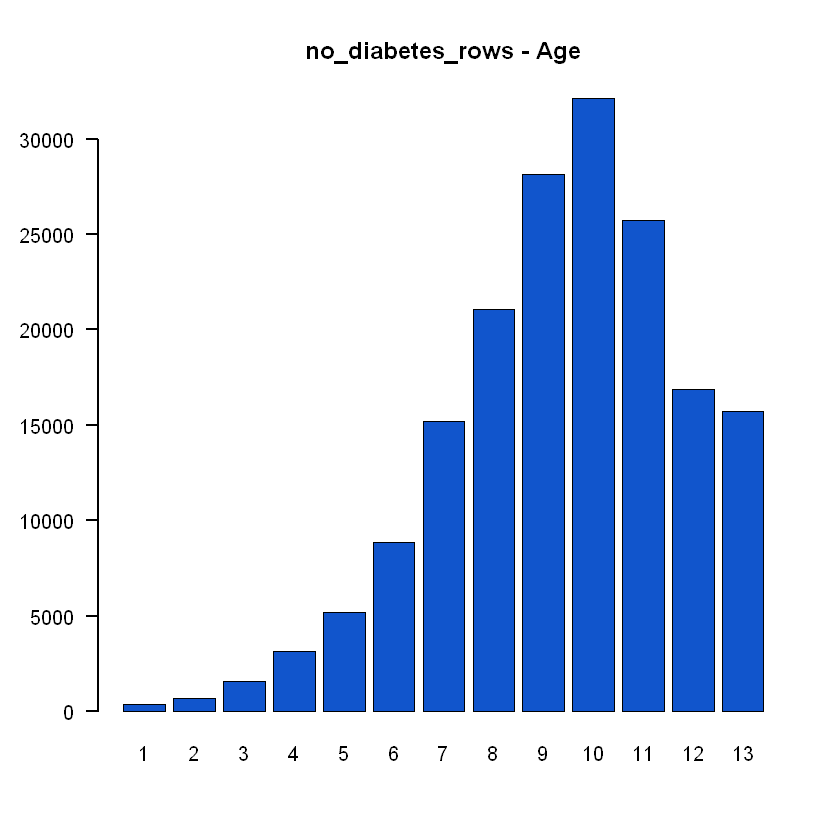

In [123]:
plot_ordinal_data(balanced_training_data, "Age")

#### 3.6.3. Education

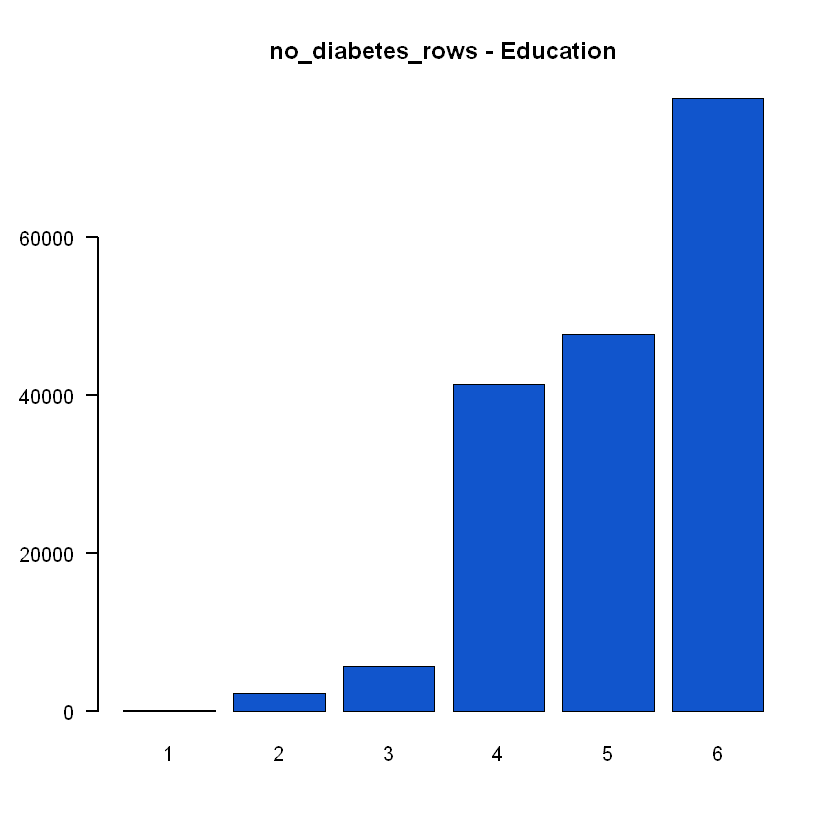

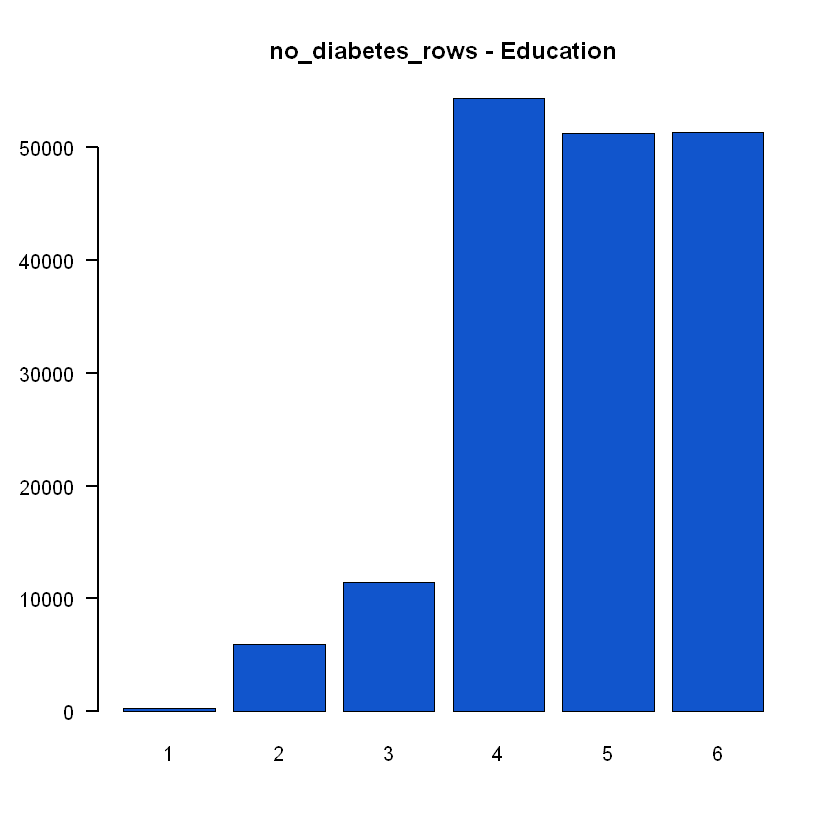

In [124]:
plot_ordinal_data(balanced_training_data, "Education")

#### 3.6.4. Income

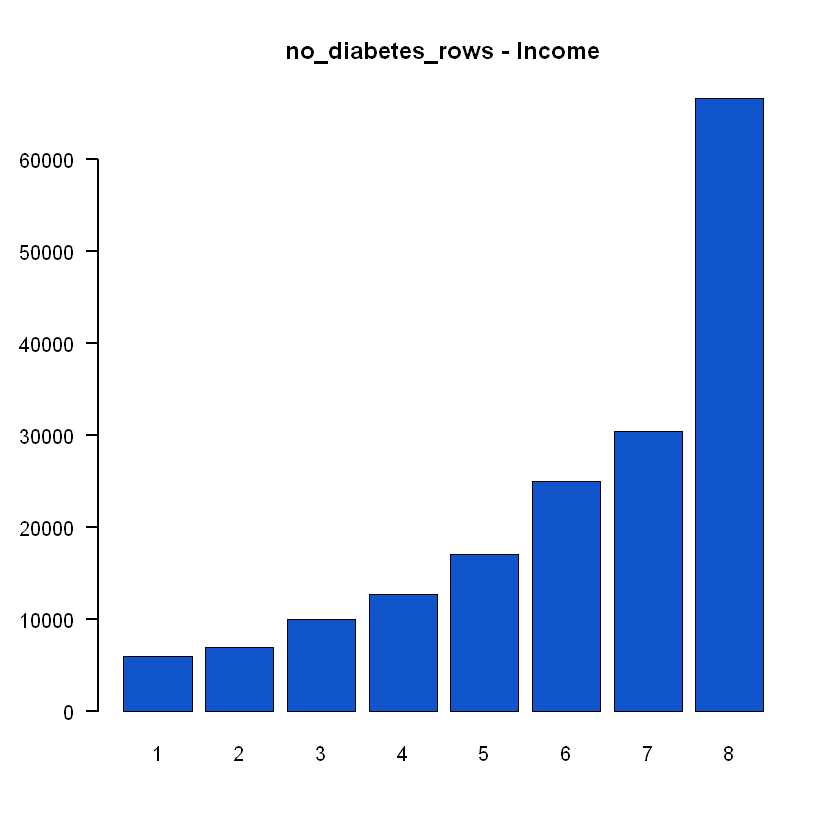

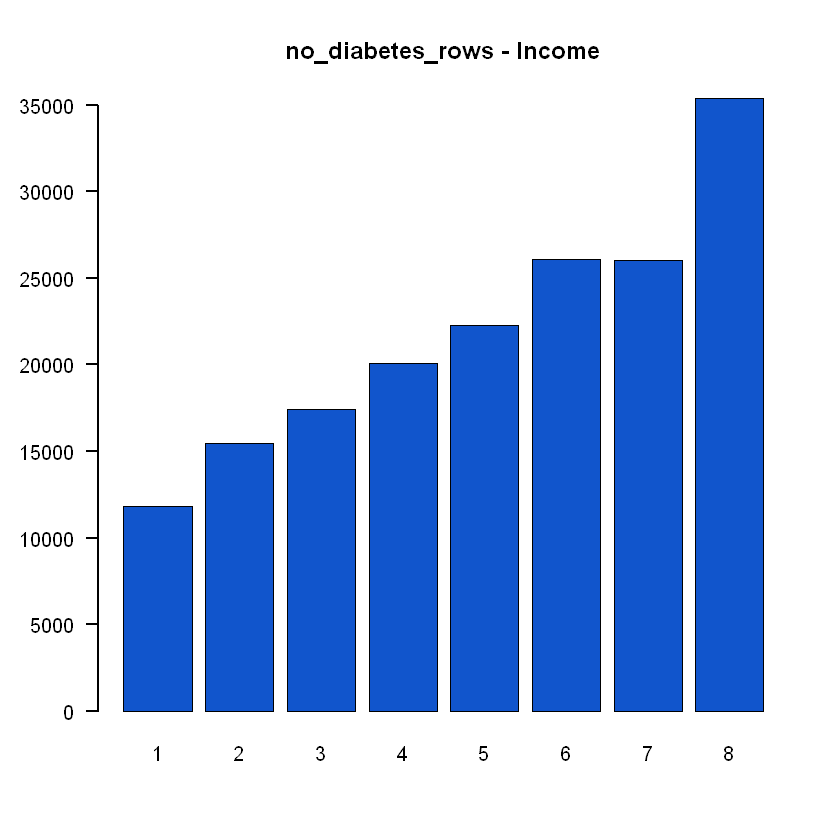

In [125]:
plot_ordinal_data(balanced_training_data, "Income")

### 3.7. Correlation analysis

In [126]:
get_correlation = function(dataframe, col_1, col_2, numerical_cols, binary_cols, ordinal_cols, response_col)
{
    if (col_1 %in% ordinal_cols || col_2 %in% ordinal_cols)
    {
        return (pcaPP::cor.fk(dataframe[,col_1], dataframe[,col_2]))
    }
    else if (col_1 %in% numerical_cols && col_2 %in% c(binary_cols, response_col) ||
             col_1 %in% c(binary_cols, response_col) && col_2 %in% numerical_cols)
    {
        return (cor.test(as.numeric(dataframe[,col_1]), as.numeric(dataframe[,col_2]))$estimate)
    }
    else if (col_1 %in% c(binary_cols, response_col) && col_2 %in% c(binary_cols, response_col))
    {
        return (rcompanion::cramerV(table(dataframe[ ,c(col_1, col_2)])))
    }
    else if (col_1 %in% numerical_cols && col_2 %in% numerical_cols)
    {
        return (cor(dataframe[,col_1], dataframe[,col_2]))
    }
    else
    {
        return (0)
    }
}    

In [127]:
all_colnames = colnames(balanced_training_data)

In [128]:
correlation_matrix = matrix(0, nrow = length(all_colnames), ncol = length(all_colnames), dimnames = list(all_colnames, all_colnames))

In [129]:
for (row_index in 1:nrow(correlation_matrix))
{
    for (col_index in row_index:ncol(correlation_matrix))
    {
        if (row_index == col_index)
        {
            correlation_matrix[row_index, col_index] = 1
        }
        else
        {
            correlation_matrix[row_index, col_index] = get_correlation(balanced_training_data, all_colnames[row_index],
                                                                       all_colnames[col_index], numerical_cols, 
                                                                       binary_cols, ordinal_cols, response_col)
        }
    }    
}

In [130]:
correlation_matrix

,HighBP,HighChol,CholCheck,BMI,BMI_over_45,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,GenHlth,MentHlth,PhysHlth,havePhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
HighBP,1,0.3129,0.10560,0.23741165,0.0740300,0.08500000,0.12650000,0.20770000,0.1381000,0.04352000,⋯,0.29186135,0.06789540,0.172052215,0.1473000,0.2356000,0.0375200000,0.274359095,-0.138028822,-0.1767636486,0.38000000
HighChol,0,1.0000,0.08787,0.12592166,0.0284300,0.09449000,0.09577000,0.18080000,0.0915500,0.04727000,⋯,0.21422931,0.08684345,0.142379819,0.1253000,0.1614000,0.0197200000,0.182933616,-0.079955971,-0.0994425529,0.28510000
CholCheck,0,0.0000,1.00000,0.04638119,0.0130300,0.00128000,0.02476000,0.04291000,0.0049440,0.01643000,⋯,0.05779312,-0.00280719,0.036790598,0.0332000,0.0473700,0.0143300000,0.082475597,-0.009117834,-0.0009930356,0.11570000
BMI,0,0.0000,0.00000,1.00000000,0.5796776,0.01438678,0.02054558,0.05938549,-0.1705345,-0.08557218,⋯,0.22052626,0.11152985,0.158991370,0.1536627,0.2439672,-0.0005963384,-0.031410821,-0.094044247,-0.0929151857,0.29018683
BMI_over_45,0,0.0000,0.00000,0.00000000,1.0000000,0.01226000,0.00544900,0.01077000,0.0924900,0.03177000,⋯,0.11221075,0.08488274,0.107164527,0.0887800,0.1478000,0.0514900000,-0.056367984,-0.039287701,-0.0743130035,0.09841000
Smoker,0,0.0000,0.00000,0.00000000,0.0000000,1.00000000,0.05986000,0.12500000,0.0802600,0.07199000,⋯,0.13225654,0.08510917,0.112425842,0.0701800,0.1166000,0.1148000000,0.085804198,-0.135411545,-0.0987725480,0.08418000
Stroke,0,0.0000,0.00000,0.00000000,0.0000000,0.00000000,1.00000000,0.22430000,0.0806000,0.01548000,⋯,0.16547033,0.08688324,0.162883363,0.1190000,0.1905000,0.0021740000,0.105298569,-0.070626319,-0.1180716729,0.12360000
HeartDiseaseorAttack,0,0.0000,0.00000,0.00000000,0.0000000,0.00000000,0.00000000,1.00000000,0.1004000,0.01912000,⋯,0.24669775,0.08369753,0.202470553,0.1513000,0.2341000,0.0979400000,0.190779487,-0.092153639,-0.1346290617,0.20850000
PhysActivity,0,0.0000,0.00000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,1.0000000,0.13500000,⋯,-0.24911148,-0.13301419,-0.243173709,0.1659000,0.2775000,0.0490300000,-0.079896554,0.178032823,0.1811303193,0.15980000
Fruits,0,0.0000,0.00000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.0000000,1.00000000,⋯,-0.08884338,-0.05913889,-0.045182607,0.0425700,0.0500200,0.0898400000,0.060681422,0.097111031,0.0632834634,0.05803000


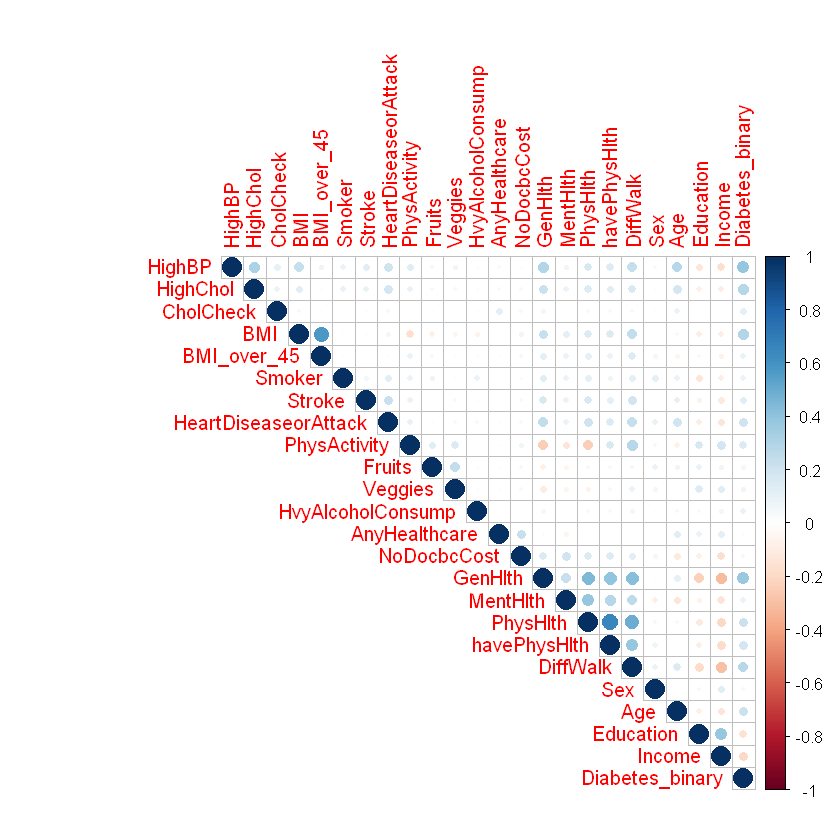

In [131]:
corrplot::corrplot(correlation_matrix, method="circle", type="upper")

## 4. Model building

In [132]:
str(balanced_training_data)

'data.frame':	349444 obs. of  24 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 1 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 1 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 24 26 ...
 $ BMI_over_45         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 1 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 1 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "

### 4.1. Data standardization

#### BMI

In [133]:
balanced_training_data$BMI = scale(balanced_training_data$BMI)
testing_data$BMI = scale(testing_data$BMI)

#### MentHlth

In [134]:
balanced_training_data$MentHlth = scale(balanced_training_data$MentHlth)
testing_data$MentHlth = scale(testing_data$MentHlth)

#### MentHlth

In [135]:
balanced_training_data$PhysHlth = scale(balanced_training_data$PhysHlth)
testing_data$PhysHlth = scale(testing_data$PhysHlth)

In [136]:
str(balanced_training_data)

'data.frame':	349444 obs. of  24 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 1 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 1 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : num [1:349444, 1] 1.414 -0.68 -0.261 -0.401 -0.82 ...
  ..- attr(*, "scaled:center")= num 29.9
  ..- attr(*, "scaled:scale")= num 7.16
 $ BMI_over_45         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 1 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 1 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : F

In [137]:
str(testing_data)

'data.frame':	50736 obs. of  24 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 2 1 1 2 1 1 2 2 2 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 2 1 1 2 2 1 1 1 2 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ BMI                 : num [1:50736, 1] 0.8392 -0.0659 -0.8201 0.5375 1.2918 ...
  ..- attr(*, "scaled:center")= num 28.4
  ..- attr(*, "scaled:scale")= num 6.63
 $ BMI_over_45         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 1 1 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 2 2 1 2 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 2 1 1 2 1 2 2 2 2 2 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 2 1 2 2 2 2 2 1 2 ...
 $ HvyAlcoholConsump   

### 4.3. Build the model

In [138]:
my_model = glm(Diabetes_binary ~ . , data = balanced_training_data, family = binomial)

#### 4.3.1. AIC stepwise

In [139]:
# AIC
# aic_result = MASS::stepAIC(my_model, direction = "backward", k = 2)

In [140]:
# # Best AIC model
# Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
#     Smoker + Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + 
#     Veggies + HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + 
#     GenHlth + MentHlth + PhysHlth + havePhysHlth + DiffWalk + 
#     Sex + Age + Education + Income

#### 4.3.2. AIC stepwise

In [141]:
# BIC
# bic_result = MASS::stepAIC(my_model, direction = "backward", k = log(nrow(balanced_training_data)))

In [142]:
# # Best BIC model
# Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
#     Stroke + HeartDiseaseorAttack + PhysActivity + Veggies + 
#     HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + 
#     Sex + Age + Education + Income

### 4.4. Best model selection

In [143]:
best_aic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
    Smoker + Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + 
    Veggies + HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + 
    GenHlth + MentHlth + PhysHlth + havePhysHlth + DiffWalk + 
    Sex + Age + Education + Income, data = balanced_training_data, family = binomial)

In [144]:
best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
    Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump + 
    AnyHealthcare + GenHlth + MentHlth + PhysHlth + DiffWalk + 
    Sex + Age + Education + Income, data = balanced_training_data, family = binomial)

In [145]:
anova(best_aic_model, best_bic_model, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,349396,355980.9,NA,NA,NA
2,349400,356024.8,-4,-43.87966,6.795845e-09


In [146]:
# COMMENT
# Choose "best_bic_model"

In [147]:
# best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
#     Stroke + HeartDiseaseorAttack + PhysActivity + Veggies + 
#     HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + 
#     Sex + Age + Education + Income, data = balanced_training_data, family = binomial)

### 4.5. Link function selection

In [148]:
# Create the dataframe
aic_link_function_df <- data.frame(
  link_function_name = c("logit", "probit", "cauchit", "cloglog"),
  aic_value = rep(0, 4)
)
aic_link_function_df

link_function_name,aic_value
<chr>,<dbl>
logit,0
probit,0
cauchit,0
cloglog,0


In [149]:
logit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
    Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump + 
    AnyHealthcare + GenHlth + MentHlth + PhysHlth + DiffWalk + 
    Sex + Age + Education + Income, data = balanced_training_data, family = binomial(link = "logit"))

In [150]:
aic_link_function_df[1, 2] = summary(logit_best_bic_model)$aic

In [151]:
probit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
    Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump + 
    AnyHealthcare + GenHlth + MentHlth + PhysHlth + DiffWalk + 
    Sex + Age + Education + Income, data = balanced_training_data, family = binomial(link = "probit"))

In [152]:
aic_link_function_df[2, 2] = summary(probit_best_bic_model)$aic

In [153]:
cauchit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
    Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump + 
    AnyHealthcare + GenHlth + MentHlth + PhysHlth + DiffWalk + 
    Sex + Age + Education + Income, data = balanced_training_data, family = binomial(link = "cauchit"))

In [154]:
aic_link_function_df[3, 2] = summary(cauchit_best_bic_model)$aic

In [155]:
cloglog_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
    Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump + 
    AnyHealthcare + GenHlth + MentHlth + PhysHlth + DiffWalk + 
    Sex + Age + Education + Income, data = balanced_training_data, family = binomial(link = "cloglog"))

In [156]:
aic_link_function_df[4, 2] = summary(cloglog_best_bic_model)$aic

In [157]:
aic_link_function_df

link_function_name,aic_value
<chr>,<dbl>
logit,356112.8
probit,356302.1
cauchit,358319.1
cloglog,360981.1


In [158]:
aic_link_function_df[which.min(aic_link_function_df$aic_value), ]

,link_function_name,aic_value
,<chr>,<dbl>
1,logit,356112.8


In [159]:
# COMMENT
# Best link function model
# logit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
#     Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump + 
#     AnyHealthcare + GenHlth + MentHlth + PhysHlth + DiffWalk + 
#     Sex + Age + Education + Income, data = balanced_training_data, family = binomial(link = "logit"))

## 5. Model training and evaluating

In [160]:
evaluate_classification_model = function(binary_predictions, binary_real_data)
{
    accuracy = mean(binary_predictions == binary_real_data)
    precision <- sum(binary_predictions == 1 & binary_real_data == 1) / sum(binary_predictions == 1)
    recall <- sum(binary_predictions == 1 & binary_real_data == 1) / sum(binary_real_data == 1)
    f1_score <- 2 * precision * recall / (precision + recall)
    
    # Print the results
    cat("Accuracy:", accuracy, "\n")
    cat("Precision:", precision, "\n")
    cat("Recall:", recall, "\n")
    cat("F1 Score:", f1_score, "\n")
}

one_for_all_metric = function(model, new_data, variable_name, binary_threshold = 0.5)
{
    predictions = predict(model, newdata = new_data, type = "response")
    binary_predictions = ifelse(predictions >= binary_threshold, 1, 0)
    actual_response = new_data[, variable_name]
    
    cat("\n", "Metric 1: ANOVA", "\n")
    print(summary(model))

    cat("\n", "Metric 2: Model performance", "\n")
    print(confusionMatrix(table(binary_predictions, actual_response)))
    evaluate_classification_model(binary_predictions, actual_response)

    cat("\n", "Metric 3: ROC curve - AUC", "\n")
    roc_score = pROC::roc(actual_response, binary_predictions)
    cat("AUC: ", auc(roc_score))
    plot(roc_score ,main = "ROC curve -- Logistic Regression ")
    
    cat("\n", "Metric 4: Overdispersion tests", "\n")
    DHARMa::testDispersion(model, alternative = "greater")

    cat("\n", "Metric 4: Goodness-of-fit", "\n")
    summary_model = summary(model)
    cat("residual:", summary_model$deviance, "\n")
    cat("dof:", summary_model$df[2], "\n")
    cat("goodness-of-fit:", 1- pchisq(summary_model$deviance, df = summary_model$df[2]))

    cat("\n", "Metric 5: QQ-norm", "\n")
    qqnorm(residuals(probit_best_bic_model))
    abline(a = 0, b = 1, col = "red")
}


 Metric 1: ANOVA 

Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + BMI_over_45 + Stroke + HeartDiseaseorAttack + PhysActivity + 
    Fruits + HvyAlcoholConsump + AnyHealthcare + GenHlth + MentHlth + 
    PhysHlth + DiffWalk + Sex + Age + Education + Income, family = binomial(link = "logit"), 
    data = balanced_training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3752  -0.8090  -0.0918   0.8251   3.0894  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -2.372765   0.047210 -50.260  < 2e-16 ***
HighBP1                0.714745   0.008900  80.310  < 2e-16 ***
HighChol1              0.541407   0.008527  63.496  < 2e-16 ***
CholCheck1             1.338575   0.036702  36.472  < 2e-16 ***
BMI                    0.574764   0.005736 100.207  < 2e-16 ***
BMI_over_451          -0.860874   0.031096 -27.684  < 2e-16 ***
Stroke1                0.185750   0.018344  10.126  < 2e-16 

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC:  0.7489251
 Metric 4: Overdispersion tests 


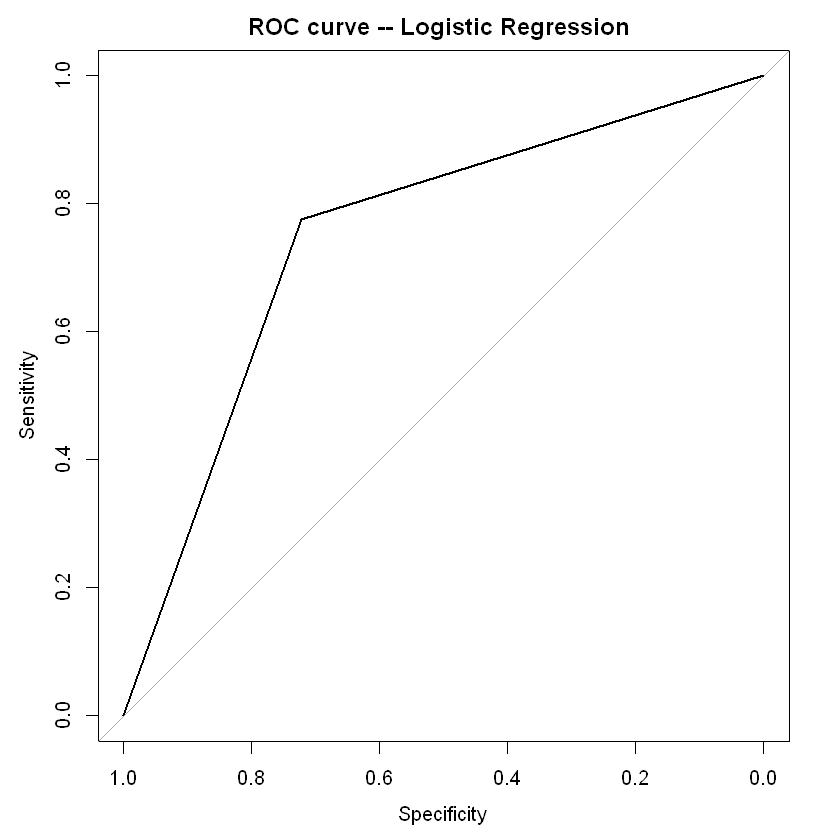


 Metric 4: Goodness-of-fit 
residual: 356024.8 
dof: 349400 
goodness-of-fit: 1.665335e-15
 Metric 5: QQ-norm 


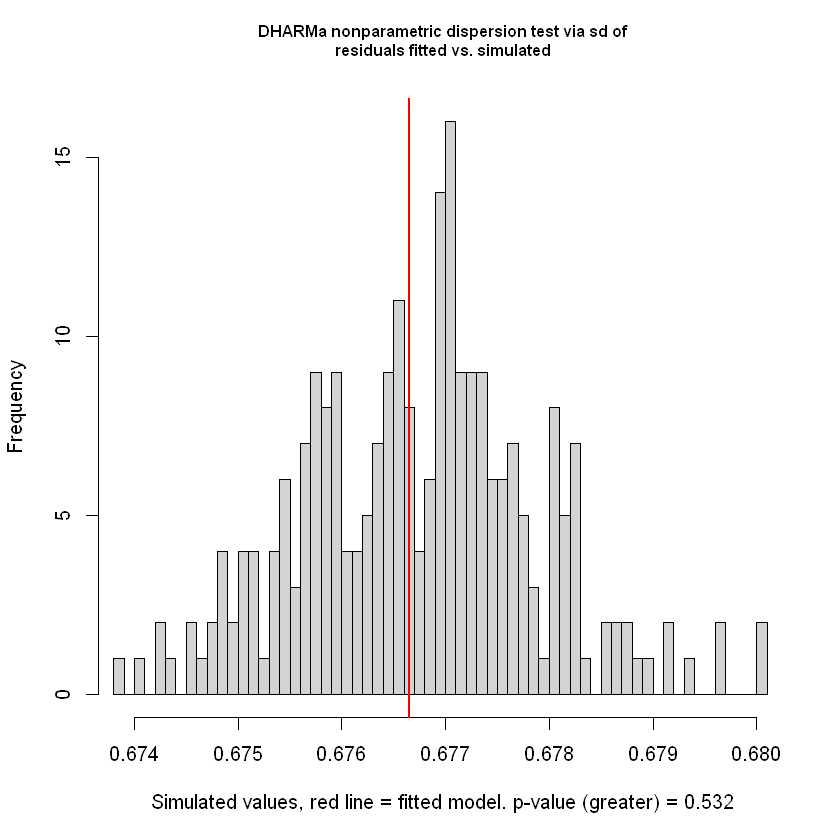

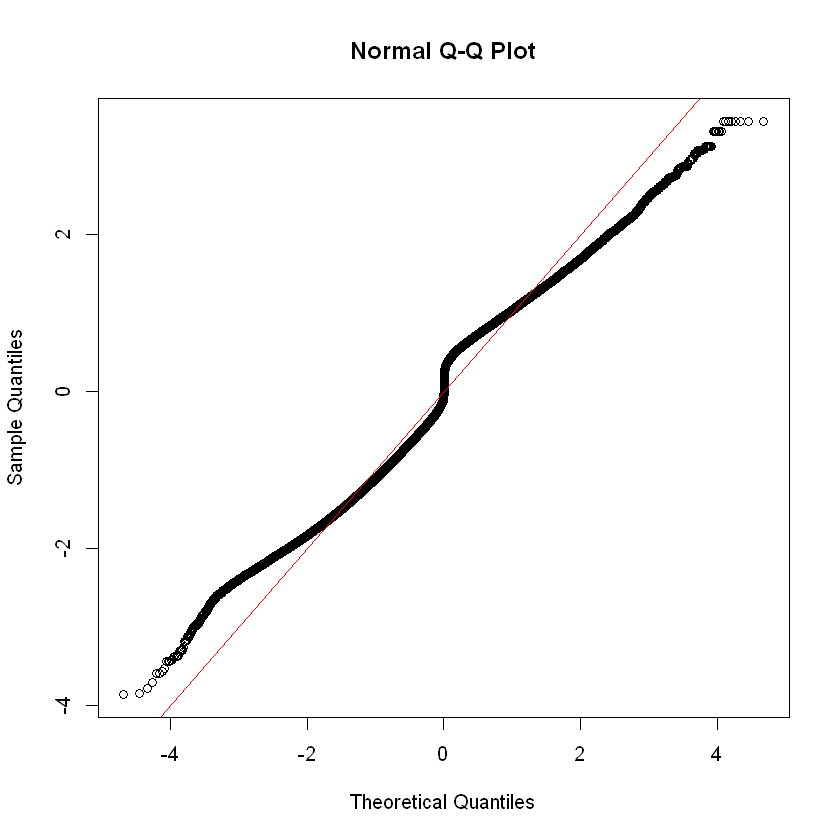

In [161]:
one_for_all_metric(logit_best_bic_model, balanced_training_data, "Diabetes_binary")


 Metric 1: ANOVA 

Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + BMI_over_45 + Stroke + HeartDiseaseorAttack + PhysActivity + 
    Fruits + HvyAlcoholConsump + AnyHealthcare + GenHlth + MentHlth + 
    PhysHlth + DiffWalk + Sex + Age + Education + Income, family = binomial(link = "logit"), 
    data = balanced_training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3752  -0.8090  -0.0918   0.8251   3.0894  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -2.372765   0.047210 -50.260  < 2e-16 ***
HighBP1                0.714745   0.008900  80.310  < 2e-16 ***
HighChol1              0.541407   0.008527  63.496  < 2e-16 ***
CholCheck1             1.338575   0.036702  36.472  < 2e-16 ***
BMI                    0.574764   0.005736 100.207  < 2e-16 ***
BMI_over_451          -0.860874   0.031096 -27.684  < 2e-16 ***
Stroke1                0.185750   0.018344  10.126  < 2e-16 

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC:  0.7493436
 Metric 4: Overdispersion tests 


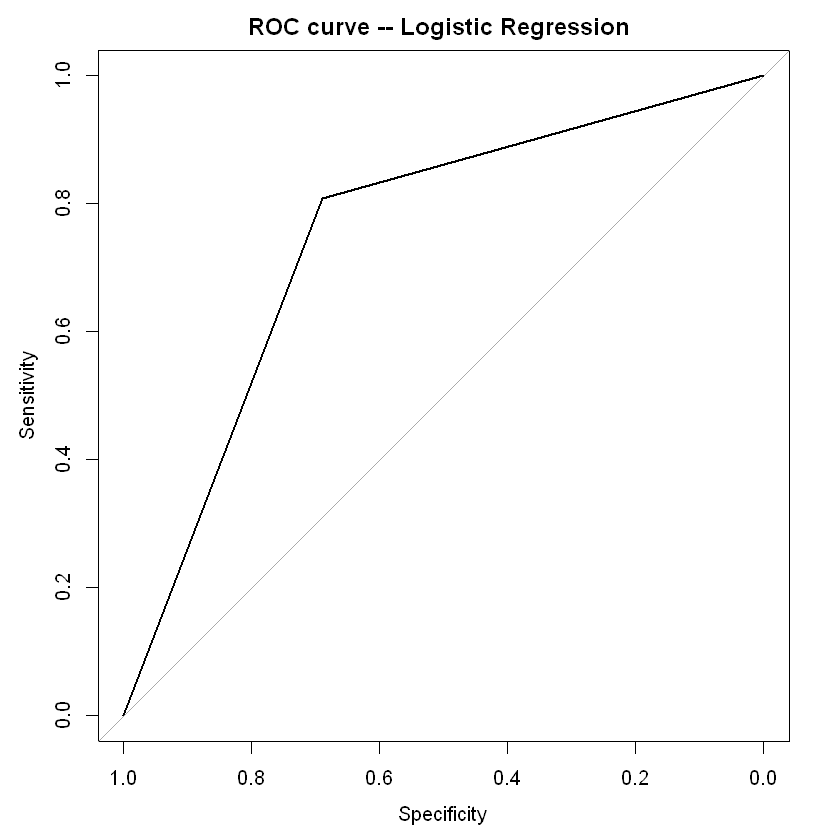


 Metric 4: Goodness-of-fit 
residual: 356024.8 
dof: 349400 
goodness-of-fit: 1.665335e-15
 Metric 5: QQ-norm 


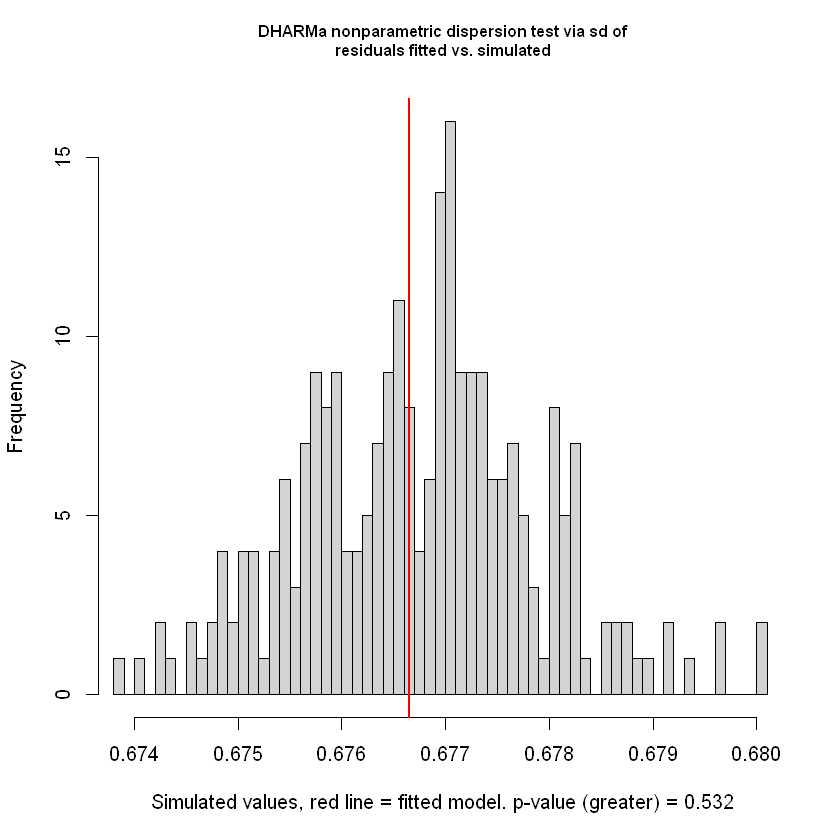

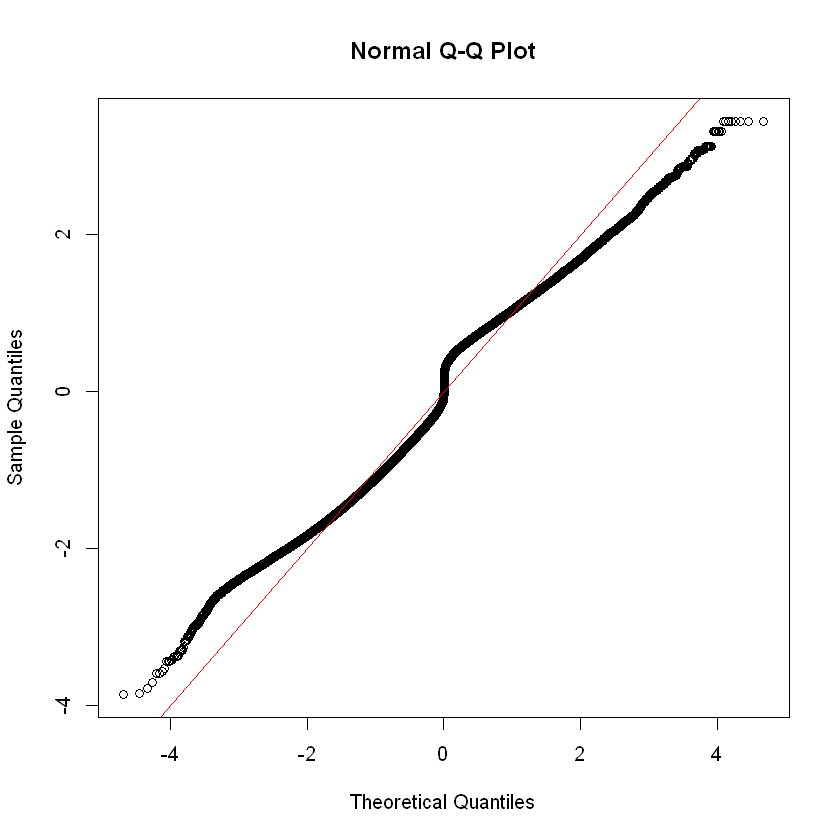

In [162]:
one_for_all_metric(logit_best_bic_model, testing_data, "Diabetes_binary")

## TEST